# Objetivo del proyecto

El objetivo del proyecto es analizar el impacto sobre la calidad del aire del consumo de diferentes tipos de energía, tanto renovables como fósiles, y cómo estos pueden influir en su evolución. Para ello, se examinarán datos a lo largo del tiempo, identificando tendencias en el consumo energético y sus efectos sobre la calidad del aire, medida a través del AQI (Air Quality Index), así como la relación con la riqueza generada (PIB per cápita) en cada país.
Para predecir la calidad del aire, aplicaremos un modelo de Machine Learning, que nos permitirá anticipar los valores del AQI.


En versiones anteriores del proyecto se observó la existencia de colinealidad entre acumulado de contaminantes y el consumo de energía con la población y esto estaba sesgando el modelo.

En esta versión se trabaja con datos relativos per capita.

In [496]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Preparación dataframe contaminación

In [498]:
# Cargar el dataset
pollutants = pd.read_csv("long-run-air-pollution.csv")
pollutants.head()

,Entity,Code,Year,Nitrogen oxide (NOx),Sulphur dioxide (SO₂) emissions,Carbon monoxide (CO) emissions,Black carbon (BC) emissions,Ammonia (NH₃) emissions,Non-methane volatile organic compounds (NMVOC) emissions
0,Afghanistan,AFG,1750,555.47860,174.87167,142073.31,1633.0308,7681.0464,13596.633
1,Afghanistan,AFG,1760,578.50757,181.99332,147859.23,1699.5359,8000.8574,14150.870
2,Afghanistan,AFG,1770,602.47980,189.38850,153867.40,1768.5956,8333.9610,14726.470
3,Afghanistan,AFG,1780,627.43220,197.06535,160104.42,1840.2854,8680.9060,15324.077
4,Afghanistan,AFG,1790,653.40310,205.03189,166576.77,1914.6805,9042.2660,15944.332


In [499]:
pollutants.shape

(48225, 9)

## Análisis exploratorio

In [501]:
# Eliminar World (porque es el total)
pollutants = pollutants[pollutants["Entity"] != 'World']
pollutants.head()

,Entity,Code,Year,Nitrogen oxide (NOx),Sulphur dioxide (SO₂) emissions,Carbon monoxide (CO) emissions,Black carbon (BC) emissions,Ammonia (NH₃) emissions,Non-methane volatile organic compounds (NMVOC) emissions
0,Afghanistan,AFG,1750,555.47860,174.87167,142073.31,1633.0308,7681.0464,13596.633
1,Afghanistan,AFG,1760,578.50757,181.99332,147859.23,1699.5359,8000.8574,14150.870
2,Afghanistan,AFG,1770,602.47980,189.38850,153867.40,1768.5956,8333.9610,14726.470
3,Afghanistan,AFG,1780,627.43220,197.06535,160104.42,1840.2854,8680.9060,15324.077
4,Afghanistan,AFG,1790,653.40310,205.03189,166576.77,1914.6805,9042.2660,15944.332


In [502]:
pollutants.info()

<class 'pandas.core.frame.DataFrame'>
Index: 47997 entries, 0 to 48224
Data columns (total 9 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   Entity                                                    47997 non-null  object 
 1   Code                                                      45489 non-null  object 
 2   Year                                                      47997 non-null  int64  
 3   Nitrogen oxide (NOx)                                      47997 non-null  float64
 4   Sulphur dioxide (SO₂) emissions                           47997 non-null  float64
 5   Carbon monoxide (CO) emissions                            47997 non-null  float64
 6   Black carbon (BC) emissions                               47997 non-null  float64
 7   Ammonia (NH₃) emissions                                   47997 non-null  float64
 8   Non-methane volatile o

In [503]:
# Ver nulos
pollutants.isnull().sum()

Entity                                                         0
Code                                                        2508
Year                                                           0
Nitrogen oxide (NOx)                                           0
Sulphur dioxide (SO₂) emissions                                0
Carbon monoxide (CO) emissions                                 0
Black carbon (BC) emissions                                    0
Ammonia (NH₃) emissions                                        0
Non-methane volatile organic compounds (NMVOC) emissions       0
dtype: int64

In [504]:
pollutants["Entity"].unique()

array(['Afghanistan', 'Africa', 'Albania', 'Algeria', 'American Samoa',
       'Angola', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Aruba',
       'Asia', 'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain',
       'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin',
       'Bermuda', 'Bhutan', 'Bolivia', 'Bosnia and Herzegovina',
       'Botswana', 'Brazil', 'British Virgin Islands', 'Brunei',
       'Bulgaria', 'Burkina Faso', 'Burundi', 'Cambodia', 'Cameroon',
       'Canada', 'Cape Verde', 'Cayman Islands',
       'Central African Republic', 'Chad', 'Chile', 'China', 'Colombia',
       'Comoros', 'Congo', 'Cook Islands', 'Costa Rica', "Cote d'Ivoire",
       'Croatia', 'Cuba', 'Curacao', 'Cyprus', 'Czechia',
       'Democratic Republic of Congo', 'Denmark', 'Djibouti', 'Dominica',
       'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador',
       'Equatorial Guinea', 'Eritrea', 'Estonia', 'Eswatini', 'Ethiopia',
       'Europe', 'Falkland Islands', 'Fa

In [505]:
# Limitar rango de fechas
pollutants = pollutants[pollutants['Year'] > 1964]
pollutants.head()

,Entity,Code,Year,Nitrogen oxide (NOx),Sulphur dioxide (SO₂) emissions,Carbon monoxide (CO) emissions,Black carbon (BC) emissions,Ammonia (NH₃) emissions,Non-methane volatile organic compounds (NMVOC) emissions
170,Afghanistan,AFG,1965,135408.42,4338.1396,369175.12,3915.5303,45766.043,157197.14
171,Afghanistan,AFG,1966,143070.02,4675.2490,386649.80,3921.2224,46615.547,165403.28
172,Afghanistan,AFG,1967,166577.62,4547.2970,375155.97,3909.1047,56003.207,160135.28
173,Afghanistan,AFG,1968,168199.50,4096.5913,341394.50,3891.4060,61445.850,144219.90
174,Afghanistan,AFG,1969,178362.27,4382.2170,357020.60,3892.4200,63012.560,151795.62


In [506]:
pollutants["Year"].unique()

array([1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975,
       1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986,
       1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997,
       1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008,
       2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019,
       2020, 2021, 2022], dtype=int64)

In [507]:
# Eliminar Code vacío
pollutants = pollutants.dropna(subset = "Code")
pollutants.head()

,Entity,Code,Year,Nitrogen oxide (NOx),Sulphur dioxide (SO₂) emissions,Carbon monoxide (CO) emissions,Black carbon (BC) emissions,Ammonia (NH₃) emissions,Non-methane volatile organic compounds (NMVOC) emissions
170,Afghanistan,AFG,1965,135408.42,4338.1396,369175.12,3915.5303,45766.043,157197.14
171,Afghanistan,AFG,1966,143070.02,4675.2490,386649.80,3921.2224,46615.547,165403.28
172,Afghanistan,AFG,1967,166577.62,4547.2970,375155.97,3909.1047,56003.207,160135.28
173,Afghanistan,AFG,1968,168199.50,4096.5913,341394.50,3891.4060,61445.850,144219.90
174,Afghanistan,AFG,1969,178362.27,4382.2170,357020.60,3892.4200,63012.560,151795.62


In [508]:
pollutants.shape

(12644, 9)

In [509]:
# Crear columna ID
pollutants["Id"] = pollutants["Code"].astype(str) + "_" + pollutants["Year"].astype(str)
pollutants.head()

,Entity,Code,Year,Nitrogen oxide (NOx),Sulphur dioxide (SO₂) emissions,Carbon monoxide (CO) emissions,Black carbon (BC) emissions,Ammonia (NH₃) emissions,Non-methane volatile organic compounds (NMVOC) emissions,Id
170,Afghanistan,AFG,1965,135408.42,4338.1396,369175.12,3915.5303,45766.043,157197.14,AFG_1965
171,Afghanistan,AFG,1966,143070.02,4675.2490,386649.80,3921.2224,46615.547,165403.28,AFG_1966
172,Afghanistan,AFG,1967,166577.62,4547.2970,375155.97,3909.1047,56003.207,160135.28,AFG_1967
173,Afghanistan,AFG,1968,168199.50,4096.5913,341394.50,3891.4060,61445.850,144219.90,AFG_1968
174,Afghanistan,AFG,1969,178362.27,4382.2170,357020.60,3892.4200,63012.560,151795.62,AFG_1969


In [510]:
pollutants.shape

(12644, 10)

## Algunas visualizaciones

In [512]:
# Agrupar emisiones por año
pollutants_agrupada = pollutants.groupby(["Year"]).agg({
    "Nitrogen oxide (NOx)": "sum",
    "Sulphur dioxide (SO₂) emissions": "sum",
    "Carbon monoxide (CO) emissions": "sum",
    "Black carbon (BC) emissions": "sum",
    "Ammonia (NH₃) emissions": "sum",
    "Non-methane volatile organic compounds (NMVOC) emissions": "sum",
}).reset_index()
pollutants_agrupada.head()

,Year,Nitrogen oxide (NOx),Sulphur dioxide (SO₂) emissions,Carbon monoxide (CO) emissions,Black carbon (BC) emissions,Ammonia (NH₃) emissions,Non-methane volatile organic compounds (NMVOC) emissions
0,1965,5.035286e+07,9.732833e+07,3.967417e+08,3.535950e+06,2.556837e+07,8.036220e+07
1,1966,5.333176e+07,1.004985e+08,4.086297e+08,3.568815e+06,2.734813e+07,8.409671e+07
2,1967,5.561747e+07,1.006956e+08,4.157114e+08,3.546841e+06,2.876328e+07,8.681178e+07
3,1968,5.957859e+07,1.052427e+08,4.357875e+08,3.650892e+06,3.026172e+07,9.181365e+07
4,1969,6.297165e+07,1.105552e+08,4.556400e+08,3.753775e+06,3.107936e+07,9.656232e+07


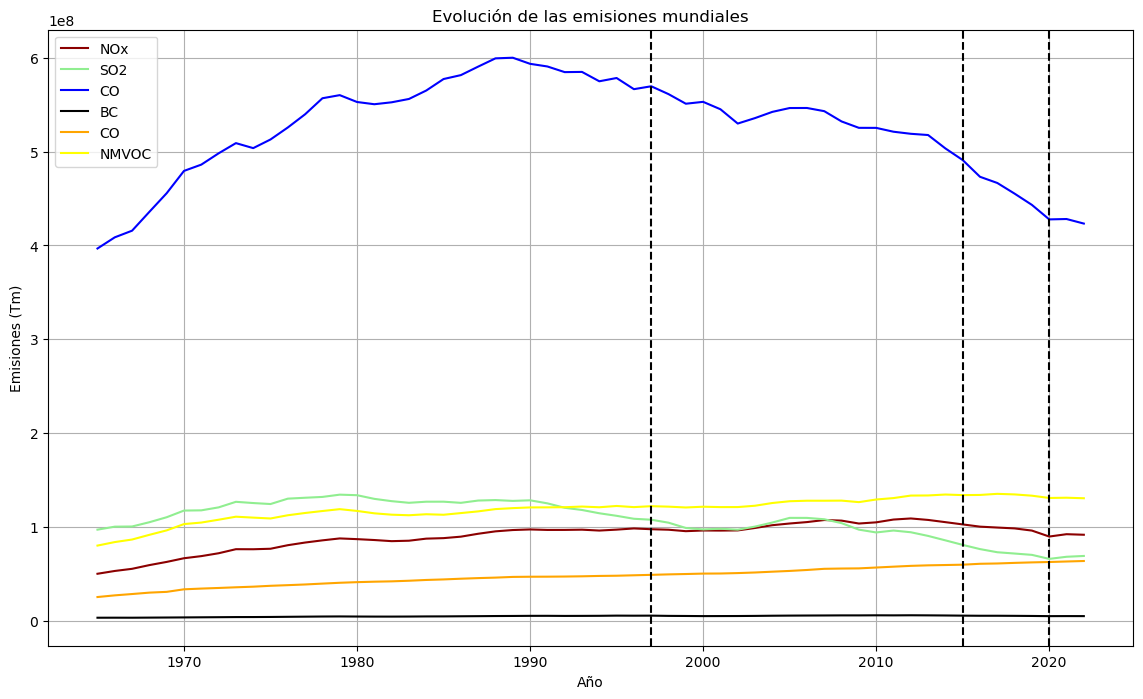

In [513]:
# Gráfico para emisiones anuales en el planeta
plt.figure(figsize=(14,8))
plt.plot(pollutants_agrupada["Year"], pollutants_agrupada["Nitrogen oxide (NOx)"], linestyle="-", label="NOx", color="darkred")
plt.plot(pollutants_agrupada["Year"], pollutants_agrupada["Sulphur dioxide (SO₂) emissions"], linestyle="-", label="SO2", color="lightgreen")
plt.plot(pollutants_agrupada["Year"], pollutants_agrupada["Carbon monoxide (CO) emissions"], linestyle="-", label="CO", color="blue")
plt.plot(pollutants_agrupada["Year"], pollutants_agrupada["Black carbon (BC) emissions"], linestyle="-", label="BC", color="black")
plt.plot(pollutants_agrupada["Year"], pollutants_agrupada["Ammonia (NH₃) emissions"], linestyle="-", label="CO", color="orange")
plt.plot(pollutants_agrupada["Year"], pollutants_agrupada["Non-methane volatile organic compounds (NMVOC) emissions"], linestyle="-", label="NMVOC", color="yellow")

plt.axvline(x = 1997, color = "black", ls ="--")   # Protocolo de Kioto
plt.axvline(x = 2015, color = "black", ls ="--")   # Acuerdo de Paris
plt.axvline(x = 2020, color = "black", ls ="--")   # COVID


plt.title('Evolución de las emisiones mundiales')
plt.xlabel('Año')
plt.ylabel('Emisiones (Tm)')
plt.legend()
plt.grid(True)
plt.show()

# Preparación dataframe energía

## Análisis exploratorio

In [516]:
# importar dataset energía

In [517]:
energia = pd.read_csv("owid-energy-data.csv")
energia.head()

,country,year,iso_code,population,gdp,biofuel_cons_change_pct,biofuel_cons_change_twh,biofuel_cons_per_capita,biofuel_consumption,biofuel_elec_per_capita,...,solar_share_elec,solar_share_energy,wind_cons_change_pct,wind_cons_change_twh,wind_consumption,wind_elec_per_capita,wind_electricity,wind_energy_per_capita,wind_share_elec,wind_share_energy
0,ASEAN (Ember),2000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN
1,ASEAN (Ember),2001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN
2,ASEAN (Ember),2002,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN
3,ASEAN (Ember),2003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN
4,ASEAN (Ember),2004,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN


In [518]:
energia.shape

(21812, 129)

In [519]:
energia.year.min()

1900

In [520]:
energia.year.max()

2023

Se parte de un dataset con demasiada información: 21812 filas y 129 columnas.
Las columnas muestran información sobre producción y consumo de energía, apgrupada por país y año, desde 1900 hasta 2023. Sin embargo, gran parte de los datos son nulos hasta 1965, por lo que se filtra la tabla desde 1965 hasta 2022 (completo)

In [522]:
# Crear un filtro con toda la info a partir del año 1975. 
energia = energia[(energia["year"] >= 1965) & (energia["year"] < 2023)]

### Tratamiento de valores nulos

In [524]:
energia.isnull().sum() /len(energia) *100

country                    0.000000
year                       0.000000
iso_code                  23.386001
population                18.152570
gdp                       39.908486
                            ...    
wind_elec_per_capita      48.652320
wind_electricity          41.988990
wind_energy_per_capita    70.944448
wind_share_elec           49.403017
wind_share_energy         70.679917
Length: 129, dtype: float64

#### iso_code - 23% nulos --> elimnar filas

In [526]:
# Eliminar filas con iso_code vacío. El iso-code indica el código de país de la entidad de estudio según la norma ISO 3166-1 alfa-3,
# por lo que las filas que no contengan ese código serán agrupaciones que debemos eliminar
paises_energia = energia[energia['iso_code'].notnull()]
paises_energia.head()

,country,year,iso_code,population,gdp,biofuel_cons_change_pct,biofuel_cons_change_twh,biofuel_cons_per_capita,biofuel_consumption,biofuel_elec_per_capita,...,solar_share_elec,solar_share_energy,wind_cons_change_pct,wind_cons_change_twh,wind_consumption,wind_elec_per_capita,wind_electricity,wind_energy_per_capita,wind_share_elec,wind_share_energy
89,Afghanistan,1965,AFG,9565154.0,1.418742e+10,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
90,Afghanistan,1966,AFG,9783153.0,1.432526e+10,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
91,Afghanistan,1967,AFG,10010037.0,1.473403e+10,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
92,Afghanistan,1968,AFG,10247782.0,1.525425e+10,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
93,Afghanistan,1969,AFG,10494491.0,1.549319e+10,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### gdp - 22% nulos --> completar

In [528]:
paises_energia.isnull().sum()/len(paises_energia) *100

country                    0.000000
year                       0.000000
iso_code                   0.000000
population                 0.793206
gdp                       22.452408
                            ...    
wind_elec_per_capita      39.175065
wind_electricity          39.175065
wind_energy_per_capita    67.842479
wind_share_elec           45.212766
wind_share_energy         73.833520
Length: 129, dtype: float64

In [529]:
# la columna "gdp" presenta más de un 20% de nulos, y consideramos que es un dato relevante para el análisis.
# Listar paises con gdp nulo
paises_nulos = paises_energia[paises_energia["gdp"].isnull()]["country"].unique()
paises_nulos

array(['American Samoa', 'Antarctica', 'Antigua and Barbuda', 'Aruba',
       'Bahamas', 'Belize', 'Bermuda', 'Bhutan', 'British Virgin Islands',
       'Brunei', 'Cayman Islands', 'Cook Islands', 'Curacao', 'Czechia',
       'East Timor', 'Eritrea', 'Falkland Islands', 'Faroe Islands',
       'Fiji', 'French Guiana', 'French Polynesia', 'Gibraltar',
       'Greenland', 'Grenada', 'Guadeloupe', 'Guam', 'Guyana', 'Kiribati',
       'Macao', 'Maldives', 'Martinique', 'Micronesia (country)',
       'Montserrat', 'Nauru', 'Netherlands Antilles', 'New Caledonia',
       'Niue', 'North Korea', 'Northern Mariana Islands',
       'Papua New Guinea', 'Reunion', 'Saint Helena',
       'Saint Kitts and Nevis', 'Saint Pierre and Miquelon',
       'Saint Vincent and the Grenadines', 'Samoa', 'Slovakia',
       'Solomon Islands', 'Somalia', 'South Sudan', 'Sudan', 'Suriname',
       'Tonga', 'Turks and Caicos Islands', 'Tuvalu', 'Ukraine',
       'United Arab Emirates', 'United States Virgin Islands

Comenzamos buscando información extra para completar estos valores, pero nos damos cuanta de que es muy dificil encontrar datos equivalentes.
Finalmente, decidimos completar con el valor promedio por continente.

In [531]:
# Listar paises del dataset
paises_energia.country.unique()

array(['Afghanistan', 'Albania', 'Algeria', 'American Samoa', 'Angola',
       'Antarctica', 'Antigua and Barbuda', 'Argentina', 'Armenia',
       'Aruba', 'Australia', 'Austria', 'Azerbaijan', 'Bahamas',
       'Bahrain', 'Bangladesh', 'Barbados', 'Belarus', 'Belgium',
       'Belize', 'Benin', 'Bermuda', 'Bhutan', 'Bolivia',
       'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'British Virgin Islands', 'Brunei', 'Bulgaria', 'Burkina Faso',
       'Burundi', 'Cambodia', 'Cameroon', 'Canada', 'Cape Verde',
       'Cayman Islands', 'Central African Republic', 'Chad', 'Chile',
       'China', 'Colombia', 'Comoros', 'Congo', 'Cook Islands',
       'Costa Rica', "Cote d'Ivoire", 'Croatia', 'Cuba', 'Curacao',
       'Cyprus', 'Czechia', 'Democratic Republic of Congo', 'Denmark',
       'Djibouti', 'Dominica', 'Dominican Republic', 'East Timor',
       'Ecuador', 'Egypt', 'El Salvador', 'Equatorial Guinea', 'Eritrea',
       'Estonia', 'Eswatini', 'Ethiopia', 'Falkland Islands',
   

In [532]:
# crear un diccionario de cada país con su continente:
continent_dict = {
    'Afghanistan': 'Asia', 'Albania': 'Europe', 'Algeria': 'Africa', 'American Samoa': 'Oceania',
    'Angola': 'Africa', 'Antarctica': 'Antarctica', 'Antigua and Barbuda': 'North America',
    'Argentina': 'South America', 'Armenia': 'Asia', 'Aruba': 'North America', 'Australia': 'Oceania',
    'Austria': 'Europe', 'Azerbaijan': 'Asia', 'Bahamas': 'North America', 'Bahrain': 'Asia',
    'Bangladesh': 'Asia', 'Barbados': 'North America', 'Belarus': 'Europe', 'Belgium': 'Europe',
    'Belize': 'North America', 'Benin': 'Africa', 'Bermuda': 'North America', 'Bhutan': 'Asia',
    'Bolivia': 'South America', 'Bosnia and Herzegovina': 'Europe', 'Botswana': 'Africa',
    'Brazil': 'South America', 'British Virgin Islands': 'North America', 'Brunei': 'Asia',
    'Bulgaria': 'Europe', 'Burkina Faso': 'Africa', 'Burundi': 'Africa', 'Cambodia': 'Asia',
    'Cameroon': 'Africa', 'Canada': 'North America', 'Cape Verde': 'Africa',
    'Cayman Islands': 'North America', 'Central African Republic': 'Africa', 'Chad': 'Africa',
    'Chile': 'South America', 'China': 'Asia', 'Colombia': 'South America', 'Comoros': 'Africa',
    'Congo': 'Africa', 'Cook Islands': 'Oceania', 'Costa Rica': 'North America',
    "Cote d'Ivoire": 'Africa', 'Croatia': 'Europe', 'Cuba': 'North America', 'Curacao': 'North America',
    'Cyprus': 'Asia', 'Czechia': 'Europe', 'Democratic Republic of Congo': 'Africa',
    'Denmark': 'Europe', 'Djibouti': 'Africa', 'Dominica': 'North America',
    'Dominican Republic': 'North America', 'East Timor': 'Asia', 'Ecuador': 'South America',
    'Egypt': 'Africa', 'El Salvador': 'North America', 'Equatorial Guinea': 'Africa',
    'Eritrea': 'Africa', 'Estonia': 'Europe', 'Eswatini': 'Africa', 'Ethiopia': 'Africa',
    'Falkland Islands': 'South America', 'Faroe Islands': 'Europe', 'Fiji': 'Oceania',
    'Finland': 'Europe', 'France': 'Europe', 'French Guiana': 'South America',
    'French Polynesia': 'Oceania', 'Gabon': 'Africa', 'Gambia': 'Africa', 'Georgia': 'Asia',
    'Germany': 'Europe', 'Ghana': 'Africa', 'Gibraltar': 'Europe', 'Greece': 'Europe',
    'Greenland': 'North America', 'Grenada': 'North America', 'Guadeloupe': 'North America',
    'Guam': 'Oceania', 'Guatemala': 'North America', 'Guinea': 'Africa', 'Guinea-Bissau': 'Africa',
    'Guyana': 'South America', 'Haiti': 'North America', 'Honduras': 'North America',
    'Hong Kong': 'Asia', 'Hungary': 'Europe', 'Iceland': 'Europe', 'India': 'Asia',
    'Indonesia': 'Asia', 'Iran': 'Asia', 'Iraq': 'Asia', 'Ireland': 'Europe', 'Israel': 'Asia',
    'Italy': 'Europe', 'Jamaica': 'North America', 'Japan': 'Asia', 'Jordan': 'Asia',
    'Kazakhstan': 'Asia', 'Kenya': 'Africa', 'Kiribati': 'Oceania', 'Kuwait': 'Asia',
    'Kyrgyzstan': 'Asia', 'Laos': 'Asia', 'Latvia': 'Europe', 'Lebanon': 'Asia',
    'Lesotho': 'Africa', 'Liberia': 'Africa', 'Libya': 'Africa', 'Lithuania': 'Europe',
    'Luxembourg': 'Europe', 'Macao': 'Asia', 'Madagascar': 'Africa', 'Malawi': 'Africa',
    'Malaysia': 'Asia', 'Maldives': 'Asia', 'Mali': 'Africa', 'Malta': 'Europe',
    'Martinique': 'North America', 'Mauritania': 'Africa', 'Mauritius': 'Africa',
    'Mexico': 'North America', 'Micronesia (country)': 'Oceania', 'Moldova': 'Europe',
    'Mongolia': 'Asia', 'Montenegro': 'Europe', 'Montserrat': 'North America', 'Morocco': 'Africa',
    'Mozambique': 'Africa', 'Myanmar': 'Asia', 'Namibia': 'Africa', 'Nauru': 'Oceania',
    'Nepal': 'Asia', 'Netherlands': 'Europe', 'Netherlands Antilles': 'North America',
    'New Caledonia': 'Oceania', 'New Zealand': 'Oceania', 'Nicaragua': 'North America',
    'Niger': 'Africa', 'Nigeria': 'Africa', 'Niue': 'Oceania', 'North Korea': 'Asia',
    'North Macedonia': 'Europe', 'Northern Mariana Islands': 'Oceania', 'Norway': 'Europe',
    'Oman': 'Asia', 'Pakistan': 'Asia', 'Palestine': 'Asia', 'Panama': 'North America',
    'Papua New Guinea': 'Oceania', 'Paraguay': 'South America', 'Peru': 'South America',
    'Philippines': 'Asia', 'Poland': 'Europe', 'Portugal': 'Europe', 'Puerto Rico': 'North America',
    'Qatar': 'Asia', 'Reunion': 'Africa', 'Romania': 'Europe', 'Russia': 'Europe',
    'Rwanda': 'Africa', 'Saint Helena': 'Africa', 'Saint Kitts and Nevis': 'North America',
    'Saint Lucia': 'North America', 'Saint Pierre and Miquelon': 'North America',
    'Saint Vincent and the Grenadines': 'North America', 'Samoa': 'Oceania',
    'Sao Tome and Principe': 'Africa', 'Saudi Arabia': 'Asia', 'Senegal': 'Africa',
    'Serbia': 'Europe', 'Seychelles': 'Africa', 'Sierra Leone': 'Africa', 'Singapore': 'Asia',
    'Slovakia': 'Europe', 'Slovenia': 'Europe', 'Solomon Islands': 'Oceania', 'Somalia': 'Africa',
    'South Africa': 'Africa', 'South Korea': 'Asia', 'South Sudan': 'Africa',
    'Spain': 'Europe', 'Sri Lanka': 'Asia', 'Sudan': 'Africa', 'Suriname': 'South America',
    'Sweden': 'Europe', 'Switzerland': 'Europe', 'Syria': 'Asia', 'Taiwan': 'Asia',
    'Tajikistan': 'Asia', 'Tanzania': 'Africa', 'Thailand': 'Asia', 'Togo': 'Africa',
    'Tonga': 'Oceania', 'Trinidad and Tobago': 'North America', 'Tunisia': 'Africa',
    'Turkey': 'Asia', 'Turkmenistan': 'Asia', 'Turks and Caicos Islands': 'North America',
    'Tuvalu': 'Oceania', 'Uganda': 'Africa', 'Ukraine': 'Europe', 'United Arab Emirates': 'Asia',
    'United Kingdom': 'Europe', 'United States': 'North America',
    'United States Virgin Islands': 'North America', 'Uruguay': 'South America',
    'Uzbekistan': 'Asia', 'Vanuatu': 'Oceania', 'Venezuela': 'South America', 'Vietnam': 'Asia',
    'Western Sahara': 'Africa', 'Yemen': 'Asia', 'Zambia': 'Africa', 'Zimbabwe': 'Africa'
}

In [533]:
# Crear una columna "Continent"
paises_energia["Continent"] = paises_energia["country"].map(continent_dict)
paises_energia.head()

C:\Users\virgi\AppData\Local\Temp\ipykernel_25432\4216197511.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  paises_energia["Continent"] = paises_energia["country"].map(continent_dict)


,country,year,iso_code,population,gdp,biofuel_cons_change_pct,biofuel_cons_change_twh,biofuel_cons_per_capita,biofuel_consumption,biofuel_elec_per_capita,...,solar_share_energy,wind_cons_change_pct,wind_cons_change_twh,wind_consumption,wind_elec_per_capita,wind_electricity,wind_energy_per_capita,wind_share_elec,wind_share_energy,Continent
89,Afghanistan,1965,AFG,9565154.0,1.418742e+10,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Asia
90,Afghanistan,1966,AFG,9783153.0,1.432526e+10,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Asia
91,Afghanistan,1967,AFG,10010037.0,1.473403e+10,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Asia
92,Afghanistan,1968,AFG,10247782.0,1.525425e+10,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Asia
93,Afghanistan,1969,AFG,10494491.0,1.549319e+10,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Asia


In [534]:
paises_energia.Continent.unique()

array(['Asia', 'Europe', 'Africa', 'Oceania', 'Antarctica',
       'North America', 'South America'], dtype=object)

In [535]:
paises_energia.isnull().sum()

country                      0
year                         0
iso_code                     0
population                  85
gdp                       2406
                          ... 
wind_electricity          4198
wind_energy_per_capita    7270
wind_share_elec           4845
wind_share_energy         7912
Continent                    0
Length: 130, dtype: int64

In [536]:
# Calcular la media del PIB por continente, ignorando NaN
pib_por_continente = paises_energia.groupby("Continent")["gdp"].transform(lambda x: x.fillna(x.mean()))
# Asignar los valores completados al dataframe
paises_energia["gdp"] = pib_por_continente

C:\Users\virgi\AppData\Local\Temp\ipykernel_25432\2271112155.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  paises_energia["gdp"] = pib_por_continente


In [537]:
# Comprobar que se han completado los nulos
paises_energia.isnull().sum()/len(paises_energia)

country                   0.000000
year                      0.000000
iso_code                  0.000000
population                0.007932
gdp                       0.003919
                            ...   
wind_electricity          0.391751
wind_energy_per_capita    0.678425
wind_share_elec           0.452128
wind_share_energy         0.738335
Continent                 0.000000
Length: 130, dtype: float64

In [538]:
# son 8 paises, que además tienen todas las demás columnas nulas, así que eliminamos esas filas

In [539]:
paises_energia = paises_energia[paises_energia['gdp'].notnull()]
paises_energia.isnull().sum()/len(paises_energia)

country                   0.000000
year                      0.000000
iso_code                  0.000000
population                0.004028
gdp                       0.000000
                            ...   
wind_electricity          0.389357
wind_energy_per_capita    0.677159
wind_share_elec           0.449972
wind_share_energy         0.737306
Continent                 0.000000
Length: 130, dtype: float64

#### datos de energías - 40-75% nulos --> completar

Observamos alto porcentaje de nulos en los datos de energía. Esto se debe a las fechas de incio de uso de esas energías, por lo que decidimos completar estos nulos con valor 0.

In [542]:
paises_energia.fillna(0, inplace=True)

In [543]:
paises_energia.isnull().sum()/len(paises_energia)

country                   0.0
year                      0.0
iso_code                  0.0
population                0.0
gdp                       0.0
                         ... 
wind_electricity          0.0
wind_energy_per_capita    0.0
wind_share_elec           0.0
wind_share_energy         0.0
Continent                 0.0
Length: 130, dtype: float64

## Otras preparaciones

In [545]:
# crear una columna Id con pais y año
paises_energia["Id"] = paises_energia["iso_code"].astype(str) + "_" + paises_energia["year"].astype(str)

In [546]:
# Transformar gdp a millones (en esta versión no hace falta)
# paises_energia["gdp_millions"] = (paises_energia["gdp"]/1000000).round(0)

In [547]:
# Calcular gdp per capita
paises_energia["pib_per_capita"] = (paises_energia["gdp"] / paises_energia["population"]).round(0)
paises_energia.head()

,country,year,iso_code,population,gdp,biofuel_cons_change_pct,biofuel_cons_change_twh,biofuel_cons_per_capita,biofuel_consumption,biofuel_elec_per_capita,...,wind_cons_change_twh,wind_consumption,wind_elec_per_capita,wind_electricity,wind_energy_per_capita,wind_share_elec,wind_share_energy,Continent,Id,pib_per_capita
89,Afghanistan,1965,AFG,9565154.0,1.418742e+10,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Asia,AFG_1965,1483.0
90,Afghanistan,1966,AFG,9783153.0,1.432526e+10,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Asia,AFG_1966,1464.0
91,Afghanistan,1967,AFG,10010037.0,1.473403e+10,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Asia,AFG_1967,1472.0
92,Afghanistan,1968,AFG,10247782.0,1.525425e+10,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Asia,AFG_1968,1489.0
93,Afghanistan,1969,AFG,10494491.0,1.549319e+10,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Asia,AFG_1969,1476.0


## Selección de columnas

El dataset original de energia tiene 129 columnas de las que solo se utilizarán los datos de consumo per capita

In [550]:
# Listar columnas a eliminar
columnas_a_eliminar = [
     "biofuel_cons_change_pct", "biofuel_cons_change_twh", "biofuel_consumption",
    "biofuel_elec_per_capita", "biofuel_electricity", "biofuel_share_elec",
    "biofuel_share_energy", "carbon_intensity_elec", "coal_cons_change_pct",
    "coal_cons_change_twh", "coal_consumption", "coal_elec_per_capita",
    "coal_electricity", "coal_prod_change_pct", "coal_prod_change_twh",
    "coal_prod_per_capita", "coal_production", "coal_share_elec",
    "coal_share_energy", "electricity_demand", "electricity_generation",
    "electricity_share_energy", "energy_cons_change_pct", "energy_cons_change_twh",
    "energy_per_capita", "energy_per_gdp", "fossil_cons_change_pct",
    "fossil_cons_change_twh", "fossil_elec_per_capita", "fossil_electricity",
    "fossil_energy_per_capita", "fossil_fuel_consumption", "fossil_share_elec",
    "fossil_share_energy", "gas_cons_change_pct", "gas_cons_change_twh",
    "gas_consumption", "gas_elec_per_capita", "gas_electricity", "gas_prod_change_pct",
    "gas_prod_change_twh", "gas_prod_per_capita", "gas_production", "gas_share_elec",
    "gas_share_energy", "greenhouse_gas_emissions", "hydro_cons_change_pct",
    "hydro_cons_change_twh", "hydro_consumption", "hydro_elec_per_capita",
    "hydro_electricity", "hydro_share_elec", "hydro_share_energy",
    "low_carbon_cons_change_pct", "low_carbon_cons_change_twh", "low_carbon_consumption",
    "low_carbon_elec_per_capita", "low_carbon_electricity", "low_carbon_energy_per_capita",
    "low_carbon_share_elec", "low_carbon_share_energy", "net_elec_imports",
    "net_elec_imports_share_demand", "nuclear_cons_change_pct", "nuclear_cons_change_twh",
    "nuclear_consumption", "nuclear_elec_per_capita", "nuclear_electricity",
    "nuclear_share_elec", "nuclear_share_energy", "oil_cons_change_pct",
    "oil_cons_change_twh", "oil_consumption", "oil_elec_per_capita", "oil_electricity",
    "oil_prod_change_pct", "oil_prod_change_twh", "oil_prod_per_capita", "oil_production",
    "oil_share_elec", "oil_share_energy", "other_renewable_consumption",
    "other_renewable_electricity", "other_renewable_exc_biofuel_electricity",
    "other_renewables_cons_change_pct", "other_renewables_cons_change_twh",
    "other_renewables_elec_per_capita", "other_renewables_elec_per_capita_exc_biofuel",
    "other_renewables_energy_per_capita", "other_renewables_share_elec",
    "other_renewables_share_elec_exc_biofuel", "other_renewables_share_energy",
    "per_capita_electricity", "primary_energy_consumption", "renewables_cons_change_pct",
    "renewables_cons_change_twh", "renewables_consumption", "renewables_elec_per_capita",
    "renewables_electricity", "renewables_energy_per_capita", "renewables_share_elec",
    "renewables_share_energy", "solar_cons_change_pct", "solar_cons_change_twh",
    "solar_consumption", "solar_elec_per_capita", "solar_electricity", "solar_share_elec",
    "solar_share_energy", "wind_cons_change_pct", "wind_cons_change_twh",
    "wind_consumption", "wind_elec_per_capita", "wind_electricity", "wind_share_elec",
    "wind_share_energy"
]
# Eliminar las columnas del DataFrame
consumos_energia = paises_energia.drop(columns=columnas_a_eliminar)

In [551]:
consumos_energia.columns

Index(['country', 'year', 'iso_code', 'population', 'gdp',
       'biofuel_cons_per_capita', 'coal_cons_per_capita',
       'gas_energy_per_capita', 'hydro_energy_per_capita',
       'nuclear_energy_per_capita', 'oil_energy_per_capita',
       'solar_energy_per_capita', 'wind_energy_per_capita', 'Continent', 'Id',
       'pib_per_capita'],
      dtype='object')

In [552]:
consumos_energia.shape

(10674, 16)

In [553]:
consumos_energia.isnull().sum()

country                      0
year                         0
iso_code                     0
population                   0
gdp                          0
biofuel_cons_per_capita      0
coal_cons_per_capita         0
gas_energy_per_capita        0
hydro_energy_per_capita      0
nuclear_energy_per_capita    0
oil_energy_per_capita        0
solar_energy_per_capita      0
wind_energy_per_capita       0
Continent                    0
Id                           0
pib_per_capita               0
dtype: int64

In [554]:
consumos_energia.drop(columns=["gdp", "iso_code"], inplace = True)

In [555]:
consumos_energia.columns

Index(['country', 'year', 'population', 'biofuel_cons_per_capita',
       'coal_cons_per_capita', 'gas_energy_per_capita',
       'hydro_energy_per_capita', 'nuclear_energy_per_capita',
       'oil_energy_per_capita', 'solar_energy_per_capita',
       'wind_energy_per_capita', 'Continent', 'Id', 'pib_per_capita'],
      dtype='object')

In [556]:
nuevo_orden_columnas = [
    'Id', 'year','Continent','country', 'population', 'pib_per_capita',
    'coal_cons_per_capita', 'gas_energy_per_capita', 'oil_energy_per_capita',
    'hydro_energy_per_capita','solar_energy_per_capita','wind_energy_per_capita',
    'nuclear_energy_per_capita'
]

# Reordenar las columnas del DataFrame
consumos_energia = consumos_energia[nuevo_orden_columnas]
consumos_energia.head()

,Id,year,Continent,country,population,pib_per_capita,coal_cons_per_capita,gas_energy_per_capita,oil_energy_per_capita,hydro_energy_per_capita,solar_energy_per_capita,wind_energy_per_capita,nuclear_energy_per_capita
89,AFG_1965,1965,Asia,Afghanistan,9565154.0,1483.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
90,AFG_1966,1966,Asia,Afghanistan,9783153.0,1464.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
91,AFG_1967,1967,Asia,Afghanistan,10010037.0,1472.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
92,AFG_1968,1968,Asia,Afghanistan,10247782.0,1489.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
93,AFG_1969,1969,Asia,Afghanistan,10494491.0,1476.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [557]:
consumos_energia.shape

(10674, 13)

In [558]:
# Crear una columna TOTAL_energy para comprobar que hay datos en las filas.
consumos_energia["TOTAL_energy"] = consumos_energia["coal_cons_per_capita"] + consumos_energia["gas_energy_per_capita"] + consumos_energia["oil_energy_per_capita"] + consumos_energia["hydro_energy_per_capita"] + consumos_energia["solar_energy_per_capita"] + consumos_energia["wind_energy_per_capita"] + consumos_energia["nuclear_energy_per_capita"]

In [559]:
# Comprobar:
consumos_energia_filtrado = consumos_energia.loc[consumos_energia["TOTAL_energy"] == 0]
consumos_energia_filtrado

,Id,year,Continent,country,population,pib_per_capita,coal_cons_per_capita,gas_energy_per_capita,oil_energy_per_capita,hydro_energy_per_capita,solar_energy_per_capita,wind_energy_per_capita,nuclear_energy_per_capita,TOTAL_energy
89,AFG_1965,1965,Asia,Afghanistan,9565154.0,1483.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
90,AFG_1966,1966,Asia,Afghanistan,9783153.0,1464.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
91,AFG_1967,1967,Asia,Afghanistan,10010037.0,1472.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
92,AFG_1968,1968,Asia,Afghanistan,10247782.0,1489.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
93,AFG_1969,1969,Asia,Afghanistan,10494491.0,1476.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21806,ZWE_2018,2018,Africa,Zimbabwe,15052191.0,1780.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
21807,ZWE_2019,2019,Africa,Zimbabwe,15354606.0,1638.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
21808,ZWE_2020,2020,Africa,Zimbabwe,15669663.0,1479.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
21809,ZWE_2021,2021,Africa,Zimbabwe,15993525.0,1572.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [560]:
# Eliminar filas donde 'TOTAL_energy' es igual a 0:
consumos_energia_clean = consumos_energia[consumos_energia['TOTAL_energy'] != 0]

In [561]:
consumos_energia_clean.shape

(4300, 14)

In [562]:
# nos quedamos con 4300 filas.

In [563]:
# en el gráfico de Europa de la version 3 del proyecto, se ve que hay un salto raro sobre 1985. Hacer comprobaciones:
check_europa = consumos_energia_clean.groupby(["Continent","year"]).agg({
    "TOTAL_energy": "count"
})

In [564]:
check_europa = check_europa.loc["Europe"]
print(check_europa)

      TOTAL_energy
year              
1965            24
1966            24
1967            24
1968            24
1969            24
1970            24
1971            24
1972            24
1973            24
1974            24
1975            24
1976            24
1977            24
1978            24
1979            24
1980            24
1981            24
1982            24
1983            24
1984            24
1985            30
1986            30
1987            30
1988            30
1989            30
1990            33
1991            33
1992            33
1993            33
1994            33
1995            33
1996            33
1997            33
1998            33
1999            33
2000            33
2001            33
2002            33
2003            33
2004            33
2005            33
2006            33
2007            33
2008            33
2009            33
2010            33
2011            33
2012            33
2013            33
2014            33
2015        

In [565]:
# El salto se debe a que en 1985 se agregan 6 paises a Europa (Belarus, Estonia, Latvia, Lithuania, Russia, Ukraine)
# y en 1989 otros 3 (Croatia, North Macedonia, Slovenia) --> INVESTIGAR ACERCA DE ESTO

In [566]:
check_europa = consumos_energia_clean[consumos_energia_clean["Continent"] == "Europe"] \
    .groupby(["Continent", "year", "country"]) \
    .agg({"TOTAL_energy": "count"}) \
    .reset_index()

print(check_europa)


     Continent  year         country  TOTAL_energy
0       Europe  1965         Austria             1
1       Europe  1965         Belgium             1
2       Europe  1965        Bulgaria             1
3       Europe  1965         Czechia             1
4       Europe  1965         Denmark             1
...        ...   ...             ...           ...
1714    Europe  2022           Spain             1
1715    Europe  2022          Sweden             1
1716    Europe  2022     Switzerland             1
1717    Europe  2022         Ukraine             1
1718    Europe  2022  United Kingdom             1

[1719 rows x 4 columns]


## Algunas visualizaciones

In [568]:
# Agrupar CONSUMOS por continente
total_energia_clean_agrupada = consumos_energia_clean.groupby(["Continent"]).agg({
    "TOTAL_energy": "sum"
}).reset_index()
total_energia_clean_agrupada = total_energia_clean_agrupada.sort_values(by="TOTAL_energy", ascending=False)
total_energia_clean_agrupada.head()

,Continent,TOTAL_energy
2,Europe,7.696096e+07
1,Asia,5.630416e+07
3,North America,1.701825e+07
4,Oceania,6.177408e+06
5,South America,5.465014e+06


Text(0.5, 1.0, 'Total de energía per capita consumida por continente')

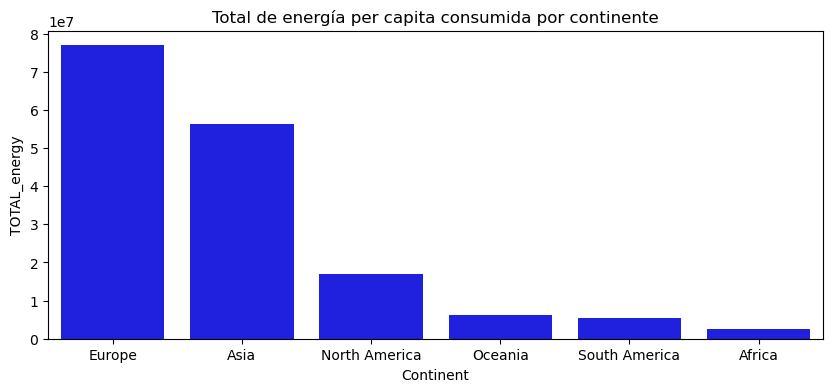

In [569]:
plt.figure(figsize=(10,4))
sns.barplot(
    data = total_energia_clean_agrupada,
    x = "Continent",
    y = "TOTAL_energy",
    color="blue"
)

plt.title("Total de energía per capita consumida por continente")

In [570]:
consumos_energia_clean.head()

,Id,year,Continent,country,population,pib_per_capita,coal_cons_per_capita,gas_energy_per_capita,oil_energy_per_capita,hydro_energy_per_capita,solar_energy_per_capita,wind_energy_per_capita,nuclear_energy_per_capita,TOTAL_energy
701,DZA_1965,1965,Africa,Algeria,12381262.0,2880.0,65.753,600.141,1244.239,95.531,0.0,0.0,0.0,2005.664
702,DZA_1966,1966,Africa,Algeria,12613398.0,2690.0,62.698,611.988,1607.236,83.224,0.0,0.0,0.0,2365.146
703,DZA_1967,1967,Africa,Algeria,12897121.0,2876.0,46.891,580.614,1468.702,94.003,0.0,0.0,0.0,2190.210
704,DZA_1968,1968,Africa,Algeria,13190979.0,3140.0,48.491,596.866,1528.871,126.206,0.0,0.0,0.0,2300.434
705,DZA_1969,1969,Africa,Algeria,13491022.0,3364.0,60.344,767.302,1579.267,79.125,0.0,0.0,0.0,2486.038


# Preparación dataframe conjunto

## Unir las tablas

In [573]:
# unir los dos datasets para tener el completo (energía + contaminación)

In [574]:
data = pd.merge(
    consumos_energia_clean,
    pollutants,
    on = "Id",
    how = "inner"
)
data.head()

,Id,year,Continent,country,population,pib_per_capita,coal_cons_per_capita,gas_energy_per_capita,oil_energy_per_capita,hydro_energy_per_capita,...,TOTAL_energy,Entity,Code,Year,Nitrogen oxide (NOx),Sulphur dioxide (SO₂) emissions,Carbon monoxide (CO) emissions,Black carbon (BC) emissions,Ammonia (NH₃) emissions,Non-methane volatile organic compounds (NMVOC) emissions
0,DZA_1965,1965,Africa,Algeria,12381262.0,2880.0,65.753,600.141,1244.239,95.531,...,2005.664,Algeria,DZA,1965,46999.930,11593.500,179855.38,26051.545,31468.566,402710.16
1,DZA_1966,1966,Africa,Algeria,12613398.0,2690.0,62.698,611.988,1607.236,83.224,...,2365.146,Algeria,DZA,1966,60368.920,15445.949,238101.97,31778.100,33037.156,518103.38
2,DZA_1967,1967,Africa,Algeria,12897121.0,2876.0,46.891,580.614,1468.702,94.003,...,2190.210,Algeria,DZA,1967,63148.332,15662.951,255757.47,35529.008,33708.195,584671.00
3,DZA_1968,1968,Africa,Algeria,13190979.0,3140.0,48.491,596.866,1528.871,126.206,...,2300.434,Algeria,DZA,1968,67018.580,16704.262,276511.12,38438.140,34374.535,637574.60
4,DZA_1969,1969,Africa,Algeria,13491022.0,3364.0,60.344,767.302,1579.267,79.125,...,2486.038,Algeria,DZA,1969,75256.450,19591.107,310436.38,40241.670,37741.200,676531.00


In [575]:
data.columns

Index(['Id', 'year', 'Continent', 'country', 'population', 'pib_per_capita',
       'coal_cons_per_capita', 'gas_energy_per_capita',
       'oil_energy_per_capita', 'hydro_energy_per_capita',
       'solar_energy_per_capita', 'wind_energy_per_capita',
       'nuclear_energy_per_capita', 'TOTAL_energy', 'Entity', 'Code', 'Year',
       'Nitrogen oxide (NOx)', 'Sulphur dioxide (SO₂) emissions',
       'Carbon monoxide (CO) emissions', 'Black carbon (BC) emissions',
       'Ammonia (NH₃) emissions',
       'Non-methane volatile organic compounds (NMVOC) emissions'],
      dtype='object')

In [576]:
data.shape

(4300, 23)

In [577]:
data.isnull().sum()

Id                                                          0
year                                                        0
Continent                                                   0
country                                                     0
population                                                  0
pib_per_capita                                              0
coal_cons_per_capita                                        0
gas_energy_per_capita                                       0
oil_energy_per_capita                                       0
hydro_energy_per_capita                                     0
solar_energy_per_capita                                     0
wind_energy_per_capita                                      0
nuclear_energy_per_capita                                   0
TOTAL_energy                                                0
Entity                                                      0
Code                                                        0
Year    

## Calcular emisiones per capita

In [579]:
# Calcular las emisiones per capita
data["NOx_per_capita"] = data["Nitrogen oxide (NOx)"] / data["population"]
data["SO2_per_capita"] = data["Sulphur dioxide (SO₂) emissions"] / data["population"]
data["CO_per_capita"] = data["Carbon monoxide (CO) emissions"] / data["population"]
data["BC_per_capita"] = data["Black carbon (BC) emissions"] / data["population"]
data["NH3_per_capita"] = data["Ammonia (NH₃) emissions"] / data["population"]
data["NMVOC_per_capita"] = data["Non-methane volatile organic compounds (NMVOC) emissions"] / data["population"]
data.head()

,Id,year,Continent,country,population,pib_per_capita,coal_cons_per_capita,gas_energy_per_capita,oil_energy_per_capita,hydro_energy_per_capita,...,Carbon monoxide (CO) emissions,Black carbon (BC) emissions,Ammonia (NH₃) emissions,Non-methane volatile organic compounds (NMVOC) emissions,NOx_per_capita,SO2_per_capita,CO_per_capita,BC_per_capita,NH3_per_capita,NMVOC_per_capita
0,DZA_1965,1965,Africa,Algeria,12381262.0,2880.0,65.753,600.141,1244.239,95.531,...,179855.38,26051.545,31468.566,402710.16,0.003796,0.000936,0.014526,0.002104,0.002542,0.032526
1,DZA_1966,1966,Africa,Algeria,12613398.0,2690.0,62.698,611.988,1607.236,83.224,...,238101.97,31778.100,33037.156,518103.38,0.004786,0.001225,0.018877,0.002519,0.002619,0.041076
2,DZA_1967,1967,Africa,Algeria,12897121.0,2876.0,46.891,580.614,1468.702,94.003,...,255757.47,35529.008,33708.195,584671.00,0.004896,0.001214,0.019831,0.002755,0.002614,0.045333
3,DZA_1968,1968,Africa,Algeria,13190979.0,3140.0,48.491,596.866,1528.871,126.206,...,276511.12,38438.140,34374.535,637574.60,0.005081,0.001266,0.020962,0.002914,0.002606,0.048334
4,DZA_1969,1969,Africa,Algeria,13491022.0,3364.0,60.344,767.302,1579.267,79.125,...,310436.38,40241.670,37741.200,676531.00,0.005578,0.001452,0.023011,0.002983,0.002798,0.050147


In [580]:
# eliminar las columnas de totales
data.drop(columns=["Nitrogen oxide (NOx)", "Sulphur dioxide (SO₂) emissions", "Carbon monoxide (CO) emissions", "Black carbon (BC) emissions", "Ammonia (NH₃) emissions", "Non-methane volatile organic compounds (NMVOC) emissions" ], inplace=True)

In [581]:
data.rename(columns={
    "NOx_per_capita": "Nitrogen oxide (NOx)",
    "SO2_per_capita": "Sulphur dioxide (SO₂) emissions",
    "CO_per_capita": "Carbon monoxide (CO) emissions",
    "BC_per_capita": "Black carbon (BC) emissions",
    "NH3_per_capita": "Ammonia (NH₃) emissions",
    "NMVOC_per_capita": "Non-methane volatile organic compounds (NMVOC) emissions"
}, inplace=True)

data.head()

,Id,year,Continent,country,population,pib_per_capita,coal_cons_per_capita,gas_energy_per_capita,oil_energy_per_capita,hydro_energy_per_capita,...,TOTAL_energy,Entity,Code,Year,Nitrogen oxide (NOx),Sulphur dioxide (SO₂) emissions,Carbon monoxide (CO) emissions,Black carbon (BC) emissions,Ammonia (NH₃) emissions,Non-methane volatile organic compounds (NMVOC) emissions
0,DZA_1965,1965,Africa,Algeria,12381262.0,2880.0,65.753,600.141,1244.239,95.531,...,2005.664,Algeria,DZA,1965,0.003796,0.000936,0.014526,0.002104,0.002542,0.032526
1,DZA_1966,1966,Africa,Algeria,12613398.0,2690.0,62.698,611.988,1607.236,83.224,...,2365.146,Algeria,DZA,1966,0.004786,0.001225,0.018877,0.002519,0.002619,0.041076
2,DZA_1967,1967,Africa,Algeria,12897121.0,2876.0,46.891,580.614,1468.702,94.003,...,2190.210,Algeria,DZA,1967,0.004896,0.001214,0.019831,0.002755,0.002614,0.045333
3,DZA_1968,1968,Africa,Algeria,13190979.0,3140.0,48.491,596.866,1528.871,126.206,...,2300.434,Algeria,DZA,1968,0.005081,0.001266,0.020962,0.002914,0.002606,0.048334
4,DZA_1969,1969,Africa,Algeria,13491022.0,3364.0,60.344,767.302,1579.267,79.125,...,2486.038,Algeria,DZA,1969,0.005578,0.001452,0.023011,0.002983,0.002798,0.050147


In [582]:
data.drop(columns=['Entity', 'Code', 'Year'], inplace=True)

In [583]:
data.head()

,Id,year,Continent,country,population,pib_per_capita,coal_cons_per_capita,gas_energy_per_capita,oil_energy_per_capita,hydro_energy_per_capita,solar_energy_per_capita,wind_energy_per_capita,nuclear_energy_per_capita,TOTAL_energy,Nitrogen oxide (NOx),Sulphur dioxide (SO₂) emissions,Carbon monoxide (CO) emissions,Black carbon (BC) emissions,Ammonia (NH₃) emissions,Non-methane volatile organic compounds (NMVOC) emissions
0,DZA_1965,1965,Africa,Algeria,12381262.0,2880.0,65.753,600.141,1244.239,95.531,0.0,0.0,0.0,2005.664,0.003796,0.000936,0.014526,0.002104,0.002542,0.032526
1,DZA_1966,1966,Africa,Algeria,12613398.0,2690.0,62.698,611.988,1607.236,83.224,0.0,0.0,0.0,2365.146,0.004786,0.001225,0.018877,0.002519,0.002619,0.041076
2,DZA_1967,1967,Africa,Algeria,12897121.0,2876.0,46.891,580.614,1468.702,94.003,0.0,0.0,0.0,2190.210,0.004896,0.001214,0.019831,0.002755,0.002614,0.045333
3,DZA_1968,1968,Africa,Algeria,13190979.0,3140.0,48.491,596.866,1528.871,126.206,0.0,0.0,0.0,2300.434,0.005081,0.001266,0.020962,0.002914,0.002606,0.048334
4,DZA_1969,1969,Africa,Algeria,13491022.0,3364.0,60.344,767.302,1579.267,79.125,0.0,0.0,0.0,2486.038,0.005578,0.001452,0.023011,0.002983,0.002798,0.050147


## Calcular índice de calidad del aire

In [585]:
scaling_factor_AQI = 500
scaling_factor_AQI

500

In [586]:
data['Nitrogen oxide (NOx)'].max()

0.1457632669071149

In [587]:
# Calcular cada índice AQI individual
data['NOX_single_AQI'] = (data['Nitrogen oxide (NOx)'] / data['Nitrogen oxide (NOx)'].max()) * scaling_factor_AQI
data['SO2_single_AQI'] = (data['Sulphur dioxide (SO₂) emissions'] / data['Sulphur dioxide (SO₂) emissions'].max()) * scaling_factor_AQI
data['CO_single_AQI'] = (data['Carbon monoxide (CO) emissions'] / data['Carbon monoxide (CO) emissions'].max()) * scaling_factor_AQI
data['BC_single_AQI'] = (data['Black carbon (BC) emissions'] / data['Black carbon (BC) emissions'].max()) * scaling_factor_AQI
data['NH3_single_AQI'] = (data['Ammonia (NH₃) emissions'] / data['Ammonia (NH₃) emissions'].max()) * scaling_factor_AQI
data['NMVOC_single_AQI'] = (data['Non-methane volatile organic compounds (NMVOC) emissions'] / data['Non-methane volatile organic compounds (NMVOC) emissions'].max()) * scaling_factor_AQI

In [588]:
data.head()

,Id,year,Continent,country,population,pib_per_capita,coal_cons_per_capita,gas_energy_per_capita,oil_energy_per_capita,hydro_energy_per_capita,...,Carbon monoxide (CO) emissions,Black carbon (BC) emissions,Ammonia (NH₃) emissions,Non-methane volatile organic compounds (NMVOC) emissions,NOX_single_AQI,SO2_single_AQI,CO_single_AQI,BC_single_AQI,NH3_single_AQI,NMVOC_single_AQI
0,DZA_1965,1965,Africa,Algeria,12381262.0,2880.0,65.753,600.141,1244.239,95.531,...,0.014526,0.002104,0.002542,0.032526,13.021296,0.850000,4.063075,12.526894,25.127593,8.781533
1,DZA_1966,1966,Africa,Algeria,12613398.0,2690.0,62.698,611.988,1607.236,83.224,...,0.018877,0.002519,0.002619,0.041076,16.417356,1.111608,5.279919,14.999288,25.894612,11.089883
2,DZA_1967,1967,Africa,Algeria,12897121.0,2876.0,46.891,580.614,1468.702,94.003,...,0.019831,0.002755,0.002614,0.045333,16.795426,1.102427,5.546664,16.400804,25.839350,12.239436
3,DZA_1968,1968,Africa,Algeria,13190979.0,3140.0,48.491,596.866,1528.871,126.206,...,0.020962,0.002914,0.002606,0.048334,17.427701,1.149527,5.863162,17.348429,25.763132,13.049583
4,DZA_1969,1969,Africa,Algeria,13491022.0,3364.0,60.344,767.302,1579.267,79.125,...,0.023011,0.002983,0.002798,0.050147,19.134662,1.318206,6.436120,17.758487,27.657295,13.538966


In [589]:
# Calcular el índice AQI global
data['EPA_AQI'] = data[["NOX_single_AQI", "SO2_single_AQI",	"CO_single_AQI", "BC_single_AQI", "NH3_single_AQI", "NMVOC_single_AQI"]].max(axis=1)
data.head()

,Id,year,Continent,country,population,pib_per_capita,coal_cons_per_capita,gas_energy_per_capita,oil_energy_per_capita,hydro_energy_per_capita,...,Black carbon (BC) emissions,Ammonia (NH₃) emissions,Non-methane volatile organic compounds (NMVOC) emissions,NOX_single_AQI,SO2_single_AQI,CO_single_AQI,BC_single_AQI,NH3_single_AQI,NMVOC_single_AQI,EPA_AQI
0,DZA_1965,1965,Africa,Algeria,12381262.0,2880.0,65.753,600.141,1244.239,95.531,...,0.002104,0.002542,0.032526,13.021296,0.850000,4.063075,12.526894,25.127593,8.781533,25.127593
1,DZA_1966,1966,Africa,Algeria,12613398.0,2690.0,62.698,611.988,1607.236,83.224,...,0.002519,0.002619,0.041076,16.417356,1.111608,5.279919,14.999288,25.894612,11.089883,25.894612
2,DZA_1967,1967,Africa,Algeria,12897121.0,2876.0,46.891,580.614,1468.702,94.003,...,0.002755,0.002614,0.045333,16.795426,1.102427,5.546664,16.400804,25.839350,12.239436,25.839350
3,DZA_1968,1968,Africa,Algeria,13190979.0,3140.0,48.491,596.866,1528.871,126.206,...,0.002914,0.002606,0.048334,17.427701,1.149527,5.863162,17.348429,25.763132,13.049583,25.763132
4,DZA_1969,1969,Africa,Algeria,13491022.0,3364.0,60.344,767.302,1579.267,79.125,...,0.002983,0.002798,0.050147,19.134662,1.318206,6.436120,17.758487,27.657295,13.538966,27.657295


In [590]:
# mapping categorias
conditions = [
    (data['EPA_AQI'] <= 50),
    (data['EPA_AQI'] <= 100),
    (data['EPA_AQI'] <= 150),
    (data['EPA_AQI'] <= 200),
    (data['EPA_AQI'] <= 300)
]

category = ["Good", "Moderate", "Unhealthy Sensitive Groups", "Unhealthy", "Very Unhealthy"]

# Aplicar condiciones
data['AQI_Category'] = np.select(conditions, category, default="Hazardous")

# Ver los primeros valores
data.head()

,Id,year,Continent,country,population,pib_per_capita,coal_cons_per_capita,gas_energy_per_capita,oil_energy_per_capita,hydro_energy_per_capita,...,Ammonia (NH₃) emissions,Non-methane volatile organic compounds (NMVOC) emissions,NOX_single_AQI,SO2_single_AQI,CO_single_AQI,BC_single_AQI,NH3_single_AQI,NMVOC_single_AQI,EPA_AQI,AQI_Category
0,DZA_1965,1965,Africa,Algeria,12381262.0,2880.0,65.753,600.141,1244.239,95.531,...,0.002542,0.032526,13.021296,0.850000,4.063075,12.526894,25.127593,8.781533,25.127593,Good
1,DZA_1966,1966,Africa,Algeria,12613398.0,2690.0,62.698,611.988,1607.236,83.224,...,0.002619,0.041076,16.417356,1.111608,5.279919,14.999288,25.894612,11.089883,25.894612,Good
2,DZA_1967,1967,Africa,Algeria,12897121.0,2876.0,46.891,580.614,1468.702,94.003,...,0.002614,0.045333,16.795426,1.102427,5.546664,16.400804,25.839350,12.239436,25.839350,Good
3,DZA_1968,1968,Africa,Algeria,13190979.0,3140.0,48.491,596.866,1528.871,126.206,...,0.002606,0.048334,17.427701,1.149527,5.863162,17.348429,25.763132,13.049583,25.763132,Good
4,DZA_1969,1969,Africa,Algeria,13491022.0,3364.0,60.344,767.302,1579.267,79.125,...,0.002798,0.050147,19.134662,1.318206,6.436120,17.758487,27.657295,13.538966,27.657295,Good


In [591]:
data.to_excel('data.xlsx', index=False)

## Análisis de multicolinealidad

In [593]:
data.columns

Index(['Id', 'year', 'Continent', 'country', 'population', 'pib_per_capita',
       'coal_cons_per_capita', 'gas_energy_per_capita',
       'oil_energy_per_capita', 'hydro_energy_per_capita',
       'solar_energy_per_capita', 'wind_energy_per_capita',
       'nuclear_energy_per_capita', 'TOTAL_energy', 'Nitrogen oxide (NOx)',
       'Sulphur dioxide (SO₂) emissions', 'Carbon monoxide (CO) emissions',
       'Black carbon (BC) emissions', 'Ammonia (NH₃) emissions',
       'Non-methane volatile organic compounds (NMVOC) emissions',
       'NOX_single_AQI', 'SO2_single_AQI', 'CO_single_AQI', 'BC_single_AQI',
       'NH3_single_AQI', 'NMVOC_single_AQI', 'EPA_AQI', 'AQI_Category'],
      dtype='object')

Tras limpiar los datos, realizamos una selección de variables clave para entrenar el modelo. Nos quedamos con los valores de consumo de energía per cápita, el PIB per cápita y la categoría del AQI. Y eliminamos variables irrelevantes:

* Consideramos que la variable "país" no es relevante para el entrenamiento del modelo, ya que podría introducir ruido. 
* En su lugar, utilizamos el continente, convirtiéndolo en variables dummies, para capturar posibles patrones geográficos sin perder información relevante.
 
Para garantizar que nuestras variables son independientes y evitar problemas en la interpretación del modelo, realizamos un análisis de correlación mediante la matriz de correlación.

Una vez seleccionadas las variables, volvemos a evaluar la colinealidad, eliminando la variable objetivo:

### De todas las variables

In [597]:
# Antes de definir el modelo evaluamos si existe colinealidad entre variables.
# Quitamos la columna AQI (nuestra "y")
columnas_a_eliminar = [
    'Id', 'year', 'country',
    'TOTAL_energy',
    'Nitrogen oxide (NOx)', 'Sulphur dioxide (SO₂) emissions', 'Carbon monoxide (CO) emissions', 'Black carbon (BC) emissions', 'Ammonia (NH₃) emissions', 'Non-methane volatile organic compounds (NMVOC) emissions',
    'NOX_single_AQI', 'SO2_single_AQI', 'CO_single_AQI', 'BC_single_AQI', 'NH3_single_AQI', 'NMVOC_single_AQI',
    'EPA_AQI', 'AQI_Category'
]

# Eliminar las columnas
data_colin = data.drop(columns=columnas_a_eliminar)

In [598]:
# Convertir dummie el continente
data_colin = pd.get_dummies(
    data_colin,
    columns = ["Continent"],
    drop_first = True                                                         
)

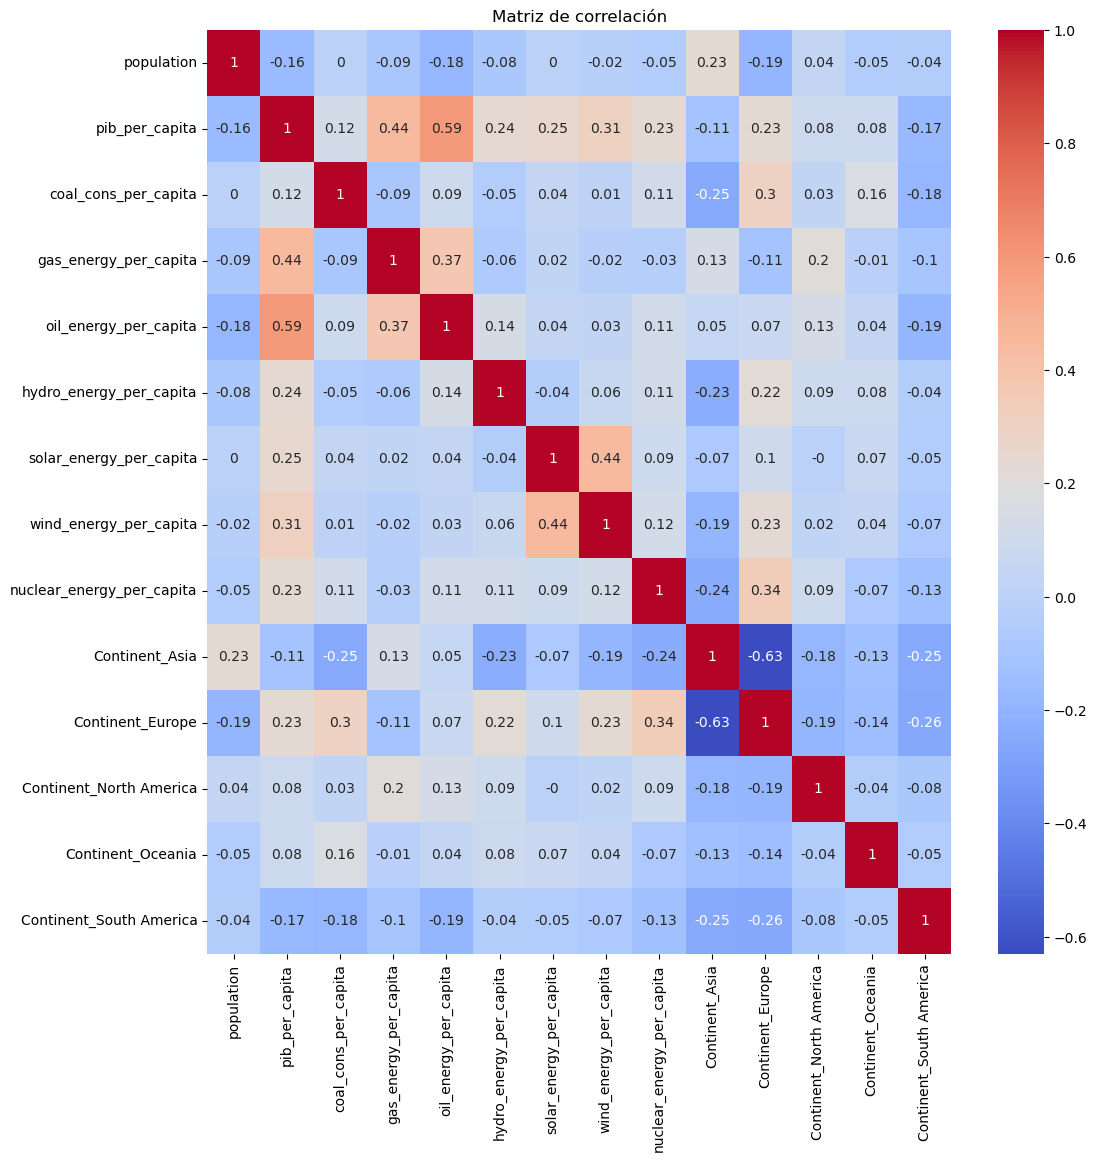

In [599]:
# Calcular matriz de colerración
matriz = data_colin.corr()
matriz = data_colin.corr().round(2)
plt.figure(figsize=(12, 12))
sns.heatmap(matriz, annot=True, cmap='coolwarm')
plt.title("Matriz de correlación")
plt.show()

In [600]:
# Calculamos el determinante de esta matriz para comprobarlo:
np.linalg.det(matriz)

0.02175112857011962

### SIN Población

In [602]:
# Continuamos analizando si existe colinealidad entre variables.
# Quitamos la columna AQI (nuestra "y") y quitamos población, porque tenemos los datos per capita
columnas_a_eliminar = [
    'Id', 'year', 'country', 'population',
    'TOTAL_energy',
    'Nitrogen oxide (NOx)', 'Sulphur dioxide (SO₂) emissions', 'Carbon monoxide (CO) emissions', 'Black carbon (BC) emissions', 'Ammonia (NH₃) emissions', 'Non-methane volatile organic compounds (NMVOC) emissions',
    'NOX_single_AQI', 'SO2_single_AQI', 'CO_single_AQI', 'BC_single_AQI', 'NH3_single_AQI', 'NMVOC_single_AQI',
    'EPA_AQI', 'AQI_Category'
]

# Eliminar las columnas
data_colin_population = data.drop(columns=columnas_a_eliminar)

In [603]:
# Convertir dummie el continente
data_colin_population = pd.get_dummies(
    data_colin_population,
    columns = ["Continent"],
    drop_first = True                                                        
)

In [604]:
data_colin_population.head()

,pib_per_capita,coal_cons_per_capita,gas_energy_per_capita,oil_energy_per_capita,hydro_energy_per_capita,solar_energy_per_capita,wind_energy_per_capita,nuclear_energy_per_capita,Continent_Asia,Continent_Europe,Continent_North America,Continent_Oceania,Continent_South America
0,2880.0,65.753,600.141,1244.239,95.531,0.0,0.0,0.0,False,False,False,False,False
1,2690.0,62.698,611.988,1607.236,83.224,0.0,0.0,0.0,False,False,False,False,False
2,2876.0,46.891,580.614,1468.702,94.003,0.0,0.0,0.0,False,False,False,False,False
3,3140.0,48.491,596.866,1528.871,126.206,0.0,0.0,0.0,False,False,False,False,False
4,3364.0,60.344,767.302,1579.267,79.125,0.0,0.0,0.0,False,False,False,False,False


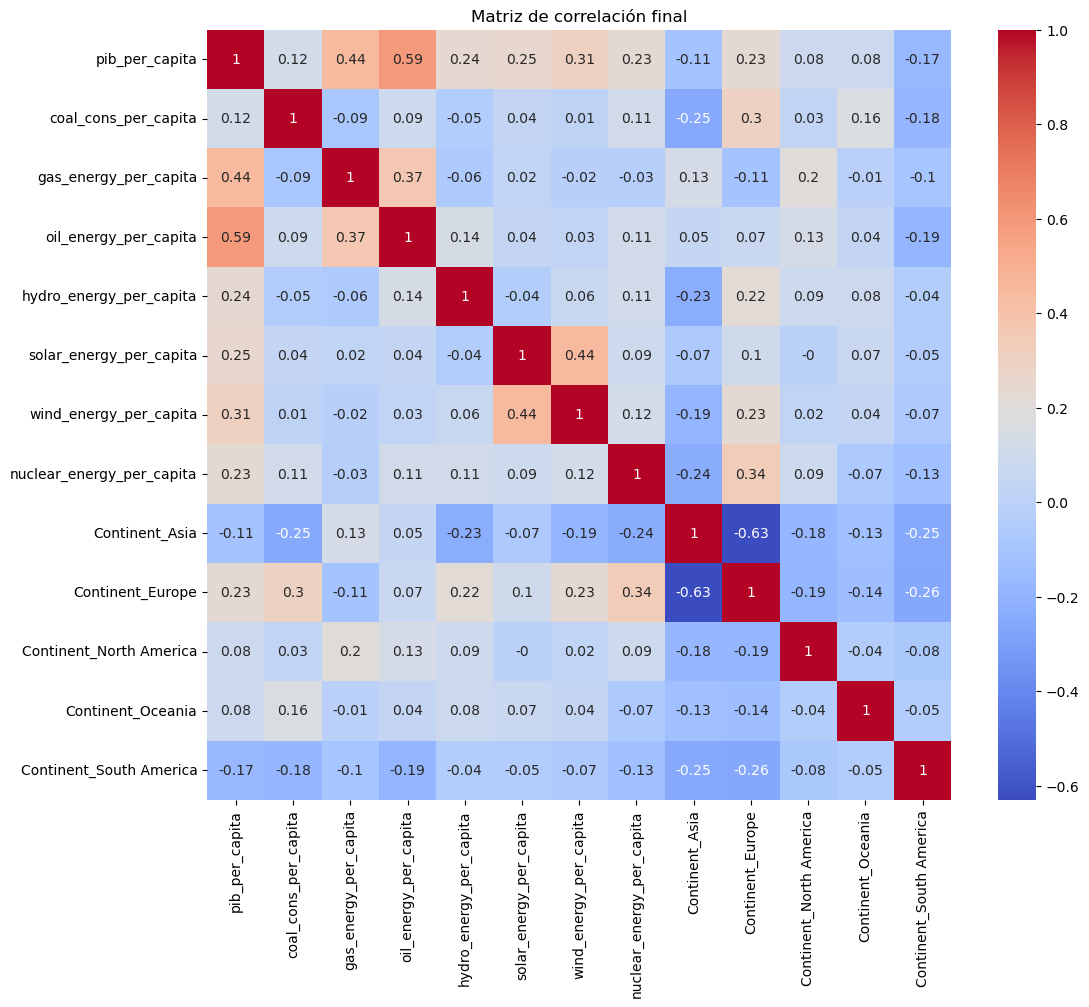

In [605]:
# Calcular matriz de colerración
matriz = data_colin_population.corr()
matriz = data_colin_population.corr().round(2)
plt.figure(figsize=(12, 10))
sns.heatmap(matriz, annot=True, cmap='coolwarm')
plt.title("Matriz de correlación final")
plt.show()

In [606]:
# Calculamos el determinante de esta matriz para comprobarlo:
np.linalg.det(matriz)

0.024625391232248817

### SIN PIB per capita

In [608]:
# Quitamos la columna AQI (nuestra "y") y quitamos pib per capita
columnas_a_eliminar = [
    'Id', 'year', 'country', 'pib_per_capita',
    'TOTAL_energy',
    'Nitrogen oxide (NOx)', 'Sulphur dioxide (SO₂) emissions', 'Carbon monoxide (CO) emissions', 'Black carbon (BC) emissions', 'Ammonia (NH₃) emissions', 'Non-methane volatile organic compounds (NMVOC) emissions',
    'NOX_single_AQI', 'SO2_single_AQI', 'CO_single_AQI', 'BC_single_AQI', 'NH3_single_AQI', 'NMVOC_single_AQI',
    'EPA_AQI', 'AQI_Category'
]

# Eliminar las columnas
data_colin_pib = data.drop(columns=columnas_a_eliminar)

In [609]:
# Convertir dummie el continente
data_colin_pib = pd.get_dummies(
    data_colin_pib,
    columns = ["Continent"],
    drop_first = True                                                         
)

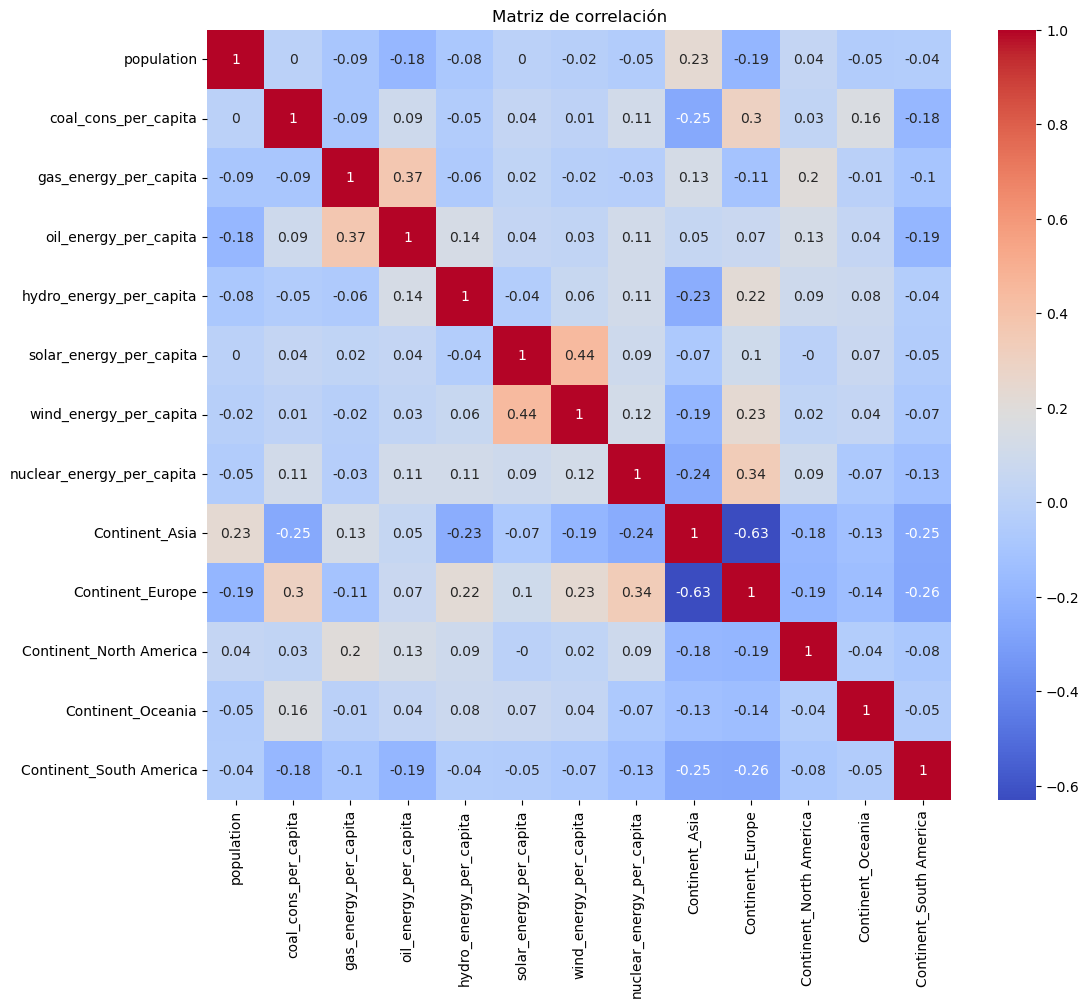

In [610]:
# Calcular matriz de colerración
matriz = data_colin_pib.corr()
matriz = data_colin_pib.corr().round(2)
plt.figure(figsize=(12, 10))
sns.heatmap(matriz, annot=True, cmap='coolwarm')
plt.title("Matriz de correlación")
plt.show()

In [611]:
# Calculamos el determinante de esta matriz para comprobarlo:
np.linalg.det(matriz)

0.05136159850723923

## Selección final de columnas

In [613]:
data.columns

Index(['Id', 'year', 'Continent', 'country', 'population', 'pib_per_capita',
       'coal_cons_per_capita', 'gas_energy_per_capita',
       'oil_energy_per_capita', 'hydro_energy_per_capita',
       'solar_energy_per_capita', 'wind_energy_per_capita',
       'nuclear_energy_per_capita', 'TOTAL_energy', 'Nitrogen oxide (NOx)',
       'Sulphur dioxide (SO₂) emissions', 'Carbon monoxide (CO) emissions',
       'Black carbon (BC) emissions', 'Ammonia (NH₃) emissions',
       'Non-methane volatile organic compounds (NMVOC) emissions',
       'NOX_single_AQI', 'SO2_single_AQI', 'CO_single_AQI', 'BC_single_AQI',
       'NH3_single_AQI', 'NMVOC_single_AQI', 'EPA_AQI', 'AQI_Category'],
      dtype='object')

In [614]:
# Para el modelo de machine learning sobran algunas columnas, incluida la población porque hemos puesto todos los valores per capita
columnas_a_eliminar = [
    'Id', 'year', 'country', 'population',
    'TOTAL_energy',
    'Nitrogen oxide (NOx)', 'Sulphur dioxide (SO₂) emissions', 'Carbon monoxide (CO) emissions', 'Black carbon (BC) emissions', 'Ammonia (NH₃) emissions', 'Non-methane volatile organic compounds (NMVOC) emissions',
    'NOX_single_AQI', 'SO2_single_AQI', 'CO_single_AQI', 'BC_single_AQI', 'NH3_single_AQI', 'NMVOC_single_AQI',
    'EPA_AQI'
]

# Eliminar las columnas
data_clean_clasif = data.drop(columns=columnas_a_eliminar)

In [615]:
data_clean_clasif.head()

,Continent,pib_per_capita,coal_cons_per_capita,gas_energy_per_capita,oil_energy_per_capita,hydro_energy_per_capita,solar_energy_per_capita,wind_energy_per_capita,nuclear_energy_per_capita,AQI_Category
0,Africa,2880.0,65.753,600.141,1244.239,95.531,0.0,0.0,0.0,Good
1,Africa,2690.0,62.698,611.988,1607.236,83.224,0.0,0.0,0.0,Good
2,Africa,2876.0,46.891,580.614,1468.702,94.003,0.0,0.0,0.0,Good
3,Africa,3140.0,48.491,596.866,1528.871,126.206,0.0,0.0,0.0,Good
4,Africa,3364.0,60.344,767.302,1579.267,79.125,0.0,0.0,0.0,Good


## Convertir dummies

In [617]:
# Convertimos en dummies la variable categórica Continent

In [618]:
data_clean_clasif = pd.get_dummies(
    data_clean_clasif,
    columns = ["Continent"],
    drop_first = True                                                         # eliminar la primera columna de las que se generan
)

In [619]:
data_clean_clasif.head()

,pib_per_capita,coal_cons_per_capita,gas_energy_per_capita,oil_energy_per_capita,hydro_energy_per_capita,solar_energy_per_capita,wind_energy_per_capita,nuclear_energy_per_capita,AQI_Category,Continent_Asia,Continent_Europe,Continent_North America,Continent_Oceania,Continent_South America
0,2880.0,65.753,600.141,1244.239,95.531,0.0,0.0,0.0,Good,False,False,False,False,False
1,2690.0,62.698,611.988,1607.236,83.224,0.0,0.0,0.0,Good,False,False,False,False,False
2,2876.0,46.891,580.614,1468.702,94.003,0.0,0.0,0.0,Good,False,False,False,False,False
3,3140.0,48.491,596.866,1528.871,126.206,0.0,0.0,0.0,Good,False,False,False,False,False
4,3364.0,60.344,767.302,1579.267,79.125,0.0,0.0,0.0,Good,False,False,False,False,False


In [620]:
# estos son los datos para generar el modelo

In [621]:
data_clean_clasif.shape

(4300, 14)

# Generar modelo machine learning - RANDOM FOREST

Para predecir la categoría del Índice de Calidad del Aire (AQI) en función del consumo de diferentes tipos de energía (fósiles, nucleares y renovables) y el PIB per cápita de un país, hemos elegido el modelo de Random Forest, debido a sus ventajas en problemas con múltiples variables y relaciones no lineales.

El modelo Random Forest es una técnica de machine learning basada en árboles de decisión, que combina múltiples árboles para mejorar la precisión y reducir errores. Su elección se debe a:
-	Alta precisión: Gracias a su método de ensamblado, reduce la varianza y mejora la estabilidad de las predicciones.
-	Capacidad para manejar problemas de clasificación y regresión: Nos permite asignar categorías al AQI o estimar valores numéricos en función de los datos de entrada.
-	Resistencia al overfitting: A diferencia de un solo árbol de decisión, Random Forest genera múltiples árboles con datos aleatorios y promedia sus resultados, evitando que el modelo se ajuste demasiado a los datos de entrenamiento.

Además, evaluaremos la importancia de cada variable en la predicción del AQI, lo que nos permitirá identificar cuáles son los factores que más influyen en la calidad del aire.

Esto puede proporcionar información valiosa para la toma de decisiones en políticas energéticas y ambientales, ayudando a definir estrategias para reducir la contaminación y mejorar la sostenibilidad del sistema energético global.


## Dividir datos en TRAIN y TEST

In [625]:
from sklearn.model_selection import train_test_split

In [626]:
# definir las variables x y la variables y
X = data_clean_clasif.loc[:, data_clean_clasif.columns != "AQI_Category"]            # todas las columnas (variables X) excepto la variable y
y = data_clean_clasif["AQI_Category"]

In [627]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    train_size = 0.75,
    test_size = 0.25
)

## Crear el modelo

Para asegurar la solidez de nuestra elección, probamos diferentes modelos antes de consolidar Random Forest como el más adecuado para nuestro caso.
* Primero evaluamos un Árbol de Decisión para entender mejor la estructura de los datos y determinar la profundidad óptima.
* Implementamos el modelo de Random Forest, que se alinea mejor con nuestra problemática.
* Para contar con una referencia estadística, probamos un modelo de Regresión Lineal Múltiple


In [630]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.tree import plot_tree

### ARBOL DE CLASIFICACION

In [632]:
# Crear un clasificador de árbol de decisión (el modelo)
clf = DecisionTreeClassifier(max_depth=2)       # le indico el corte, cuántas preguntas quiero hacer
clf

DecisionTreeClassifier(max_depth=2)

In [633]:
# Entrenar el modelo con los datos de entrenamiento
clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2)

In [634]:
# Hacer predicciones sobre el conjunto de prueba
y_pred = clf.predict(X_test)

# Calcular la precisión del modelo, se puede usar una función en lugar de la fórmula:
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy of the Decision Tree classifier: {accuracy}')

Accuracy of the Decision Tree classifier: 0.4595348837209302


In [635]:
# Probar diferentes profundidades
from sklearn.model_selection import cross_val_score
# La profundidad (nº de preguntas) no tiene que corresponderse con el nº de variables (columnas), puede hacerse 10 preguntas con 2 variables.
# probamos una profundidad grande para ver si empieza a bajar, por ejemplo 80:
for depth in [3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 80]:    # None = sin límite 
    clf = DecisionTreeClassifier(max_depth=depth, random_state=42)
    # Evaluar con validación cruzada
    scores = cross_val_score(clf, X_train, y_train, cv=5, scoring='accuracy')
    print(f"Max Depth: {depth}, Mean Accuracy: {scores.mean():.4f}")

Max Depth: 3, Mean Accuracy: 0.5107
Max Depth: 4, Mean Accuracy: 0.5715
Max Depth: 5, Mean Accuracy: 0.6099
Max Depth: 6, Mean Accuracy: 0.6614
Max Depth: 7, Mean Accuracy: 0.6843
Max Depth: 8, Mean Accuracy: 0.7271
Max Depth: 9, Mean Accuracy: 0.7488
Max Depth: 10, Mean Accuracy: 0.7712
Max Depth: 11, Mean Accuracy: 0.7836
Max Depth: 12, Mean Accuracy: 0.7963
Max Depth: 13, Mean Accuracy: 0.8050
Max Depth: 14, Mean Accuracy: 0.8112
Max Depth: 15, Mean Accuracy: 0.8140
Max Depth: 16, Mean Accuracy: 0.8171
Max Depth: 17, Mean Accuracy: 0.8136
Max Depth: 18, Mean Accuracy: 0.8146
Max Depth: 19, Mean Accuracy: 0.8143
Max Depth: 20, Mean Accuracy: 0.8136
Max Depth: 80, Mean Accuracy: 0.8136


In [636]:
# La profundidad óptima del ARBOL DE DECISION es 16.
# Ejecutar el modelo con 16
clf = DecisionTreeClassifier(max_depth=16)      
clf.fit(X_train, y_train)
# Hacer predicciones sobre el conjunto de prueba
y_pred = clf.predict(X_test)

In [637]:
scores = cross_val_score(clf, X_train, y_train, cv=5, scoring='accuracy')
# print(f"Max Depth: {depth}, Mean Accuracy: {scores.mean():.4f}")
scores.mean()

0.8111627906976745

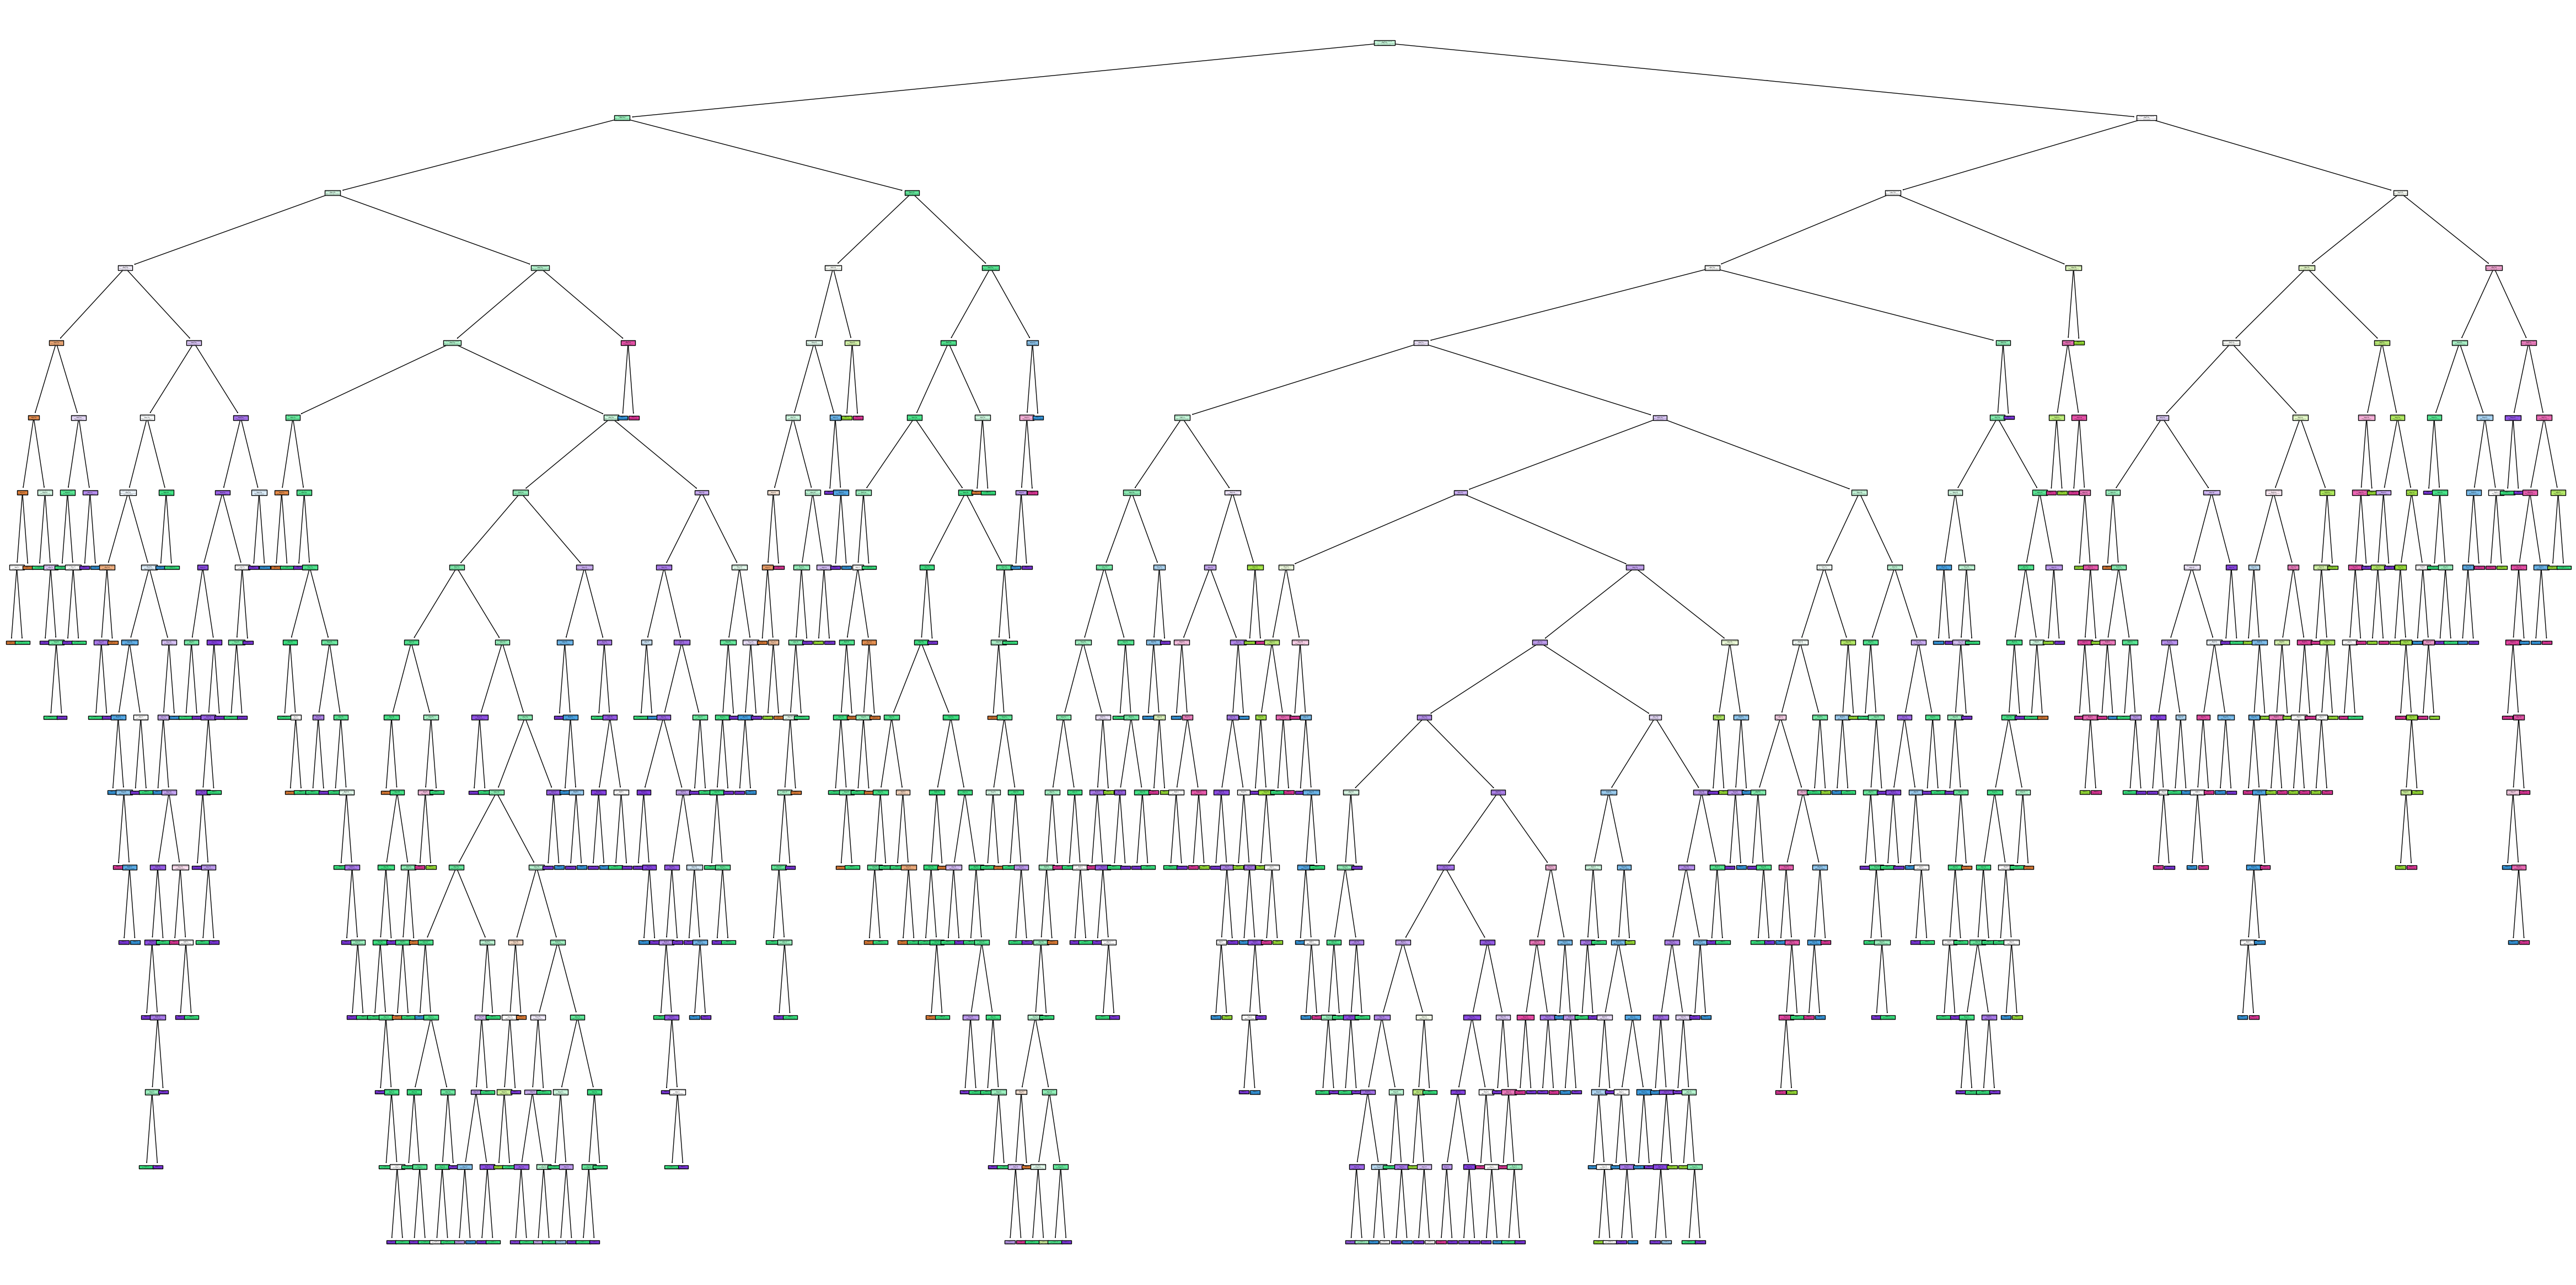

In [638]:
# Obtener las clases únicas de la columna ICA_Categoria
class_names = data_clean_clasif['AQI_Category'].unique().astype(str)

# Visualizar el árbol del modelo
plt.figure(figsize=(60,30))
plot_tree(clf, filled=True, feature_names=data_clean_clasif.columns, class_names=class_names)
plt.show()

### RANDOM FOREST

In [640]:
from sklearn.ensemble import RandomForestClassifier

In [641]:
# Crear el modelo de random forest
rf_clf = RandomForestClassifier(max_depth = 16)   # por defecto genera 100 arboles (estimadores) y a máxima profundidad
rf_clf.fit(X_train, y_train)                                                   # con n_estimators = se puede indicar la cantidad de árboles que se quiere

RandomForestClassifier(max_depth=16)

In [642]:
# Realizar predicciones
y_pred_rf = rf_clf.predict(X_test)

In [643]:
# Evaluar el modelo
accuracy_rf = np.mean(y_pred_rf == y_test)
print(f'Accuracy del Random Forest: {accuracy_rf}')

Accuracy del Random Forest: 0.8902325581395348


### Regresión Lineal Múltiple (prueba)

In [645]:
from sklearn.feature_selection import RFE         # función de selección backward
from sklearn.linear_model import LinearRegression # es lo mismo que el olr de la otra librería

In [646]:
# para probar Regresion Lineal tenemos que usar un valor de y continuo: el valor EPA_AQI. Generamos una nueva tabla data_clean_reg

In [647]:
columnas_a_eliminar = [
    'Id', 'year', 'country',
    'TOTAL_energy',
    'Nitrogen oxide (NOx)', 'Sulphur dioxide (SO₂) emissions', 'Carbon monoxide (CO) emissions', 'Black carbon (BC) emissions', 'Ammonia (NH₃) emissions', 'Non-methane volatile organic compounds (NMVOC) emissions',
    'NOX_single_AQI', 'SO2_single_AQI', 'CO_single_AQI', 'BC_single_AQI', 'NH3_single_AQI', 'NMVOC_single_AQI',
    'AQI_Category'
]

# Eliminar las columnas
data_clean_reg = data.drop(columns=columnas_a_eliminar)

In [648]:
# Convertir Continente en dummies:
data_clean_reg = pd.get_dummies(
    data_clean_reg,
    columns = ["Continent"],
    drop_first = True                                                         
)
data_clean_reg.head()

,population,pib_per_capita,coal_cons_per_capita,gas_energy_per_capita,oil_energy_per_capita,hydro_energy_per_capita,solar_energy_per_capita,wind_energy_per_capita,nuclear_energy_per_capita,EPA_AQI,Continent_Asia,Continent_Europe,Continent_North America,Continent_Oceania,Continent_South America
0,12381262.0,2880.0,65.753,600.141,1244.239,95.531,0.0,0.0,0.0,25.127593,False,False,False,False,False
1,12613398.0,2690.0,62.698,611.988,1607.236,83.224,0.0,0.0,0.0,25.894612,False,False,False,False,False
2,12897121.0,2876.0,46.891,580.614,1468.702,94.003,0.0,0.0,0.0,25.839350,False,False,False,False,False
3,13190979.0,3140.0,48.491,596.866,1528.871,126.206,0.0,0.0,0.0,25.763132,False,False,False,False,False
4,13491022.0,3364.0,60.344,767.302,1579.267,79.125,0.0,0.0,0.0,27.657295,False,False,False,False,False


In [649]:
# Calcular matriz de colerración
matriz = data_clean_reg.corr()

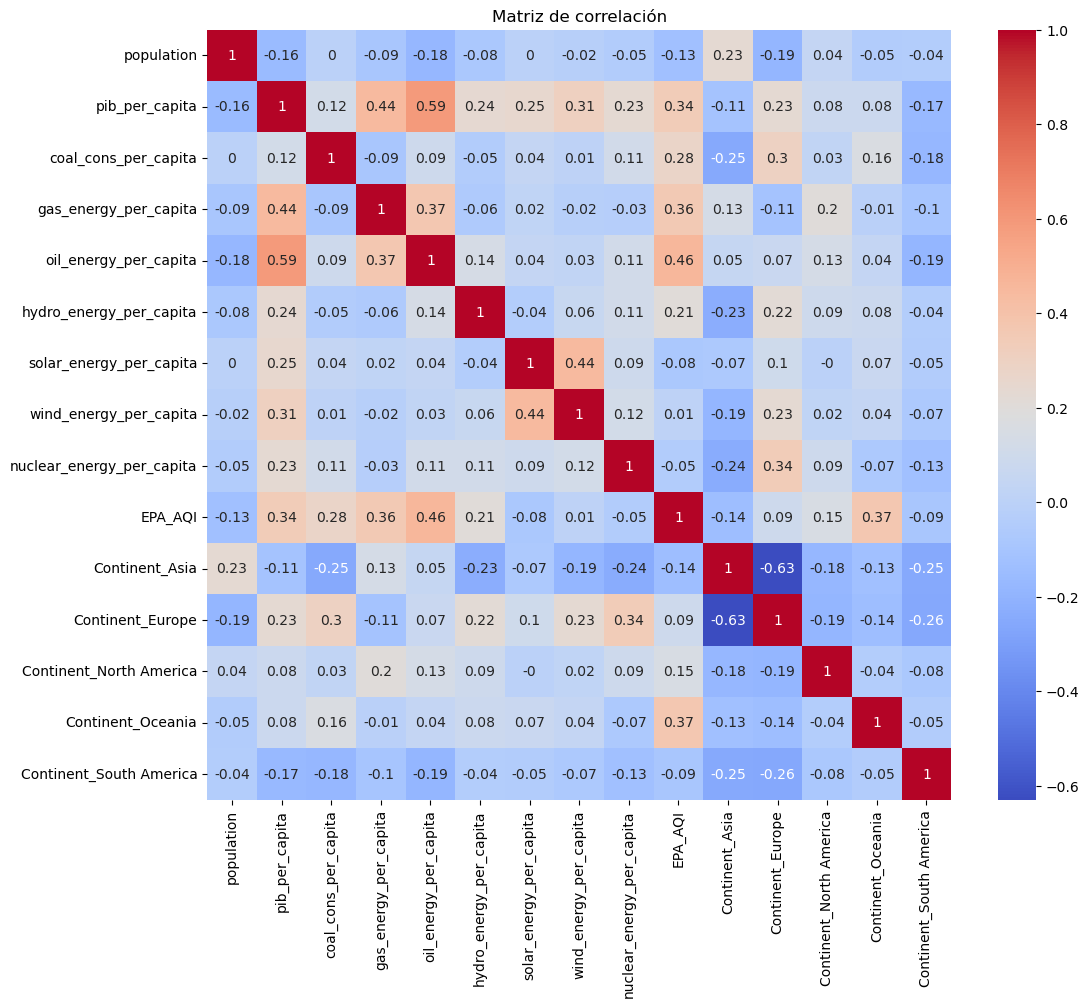

In [650]:
# Visualizar la matriz de correlación
matriz = data_clean_reg.corr().round(2)
plt.figure(figsize=(12, 10))
sns.heatmap(matriz, annot=True, cmap='coolwarm')
plt.title("Matriz de correlación")
plt.show()

In [651]:
# Calculamos el determinante de esta matriz para comprobarlo:
np.linalg.det(matriz)

0.010764262336107016

In [652]:
# DET = 0.01 --> hay colinealidad. Es conveniente hacer estudio del VIF para seleccionar variables

In [653]:
# NO es necesario tener separados los datos en X e y para el cálculo del VIF, así que lo hacemos antes

In [654]:
data_clean_reg.head()

,population,pib_per_capita,coal_cons_per_capita,gas_energy_per_capita,oil_energy_per_capita,hydro_energy_per_capita,solar_energy_per_capita,wind_energy_per_capita,nuclear_energy_per_capita,EPA_AQI,Continent_Asia,Continent_Europe,Continent_North America,Continent_Oceania,Continent_South America
0,12381262.0,2880.0,65.753,600.141,1244.239,95.531,0.0,0.0,0.0,25.127593,False,False,False,False,False
1,12613398.0,2690.0,62.698,611.988,1607.236,83.224,0.0,0.0,0.0,25.894612,False,False,False,False,False
2,12897121.0,2876.0,46.891,580.614,1468.702,94.003,0.0,0.0,0.0,25.839350,False,False,False,False,False
3,13190979.0,3140.0,48.491,596.866,1528.871,126.206,0.0,0.0,0.0,25.763132,False,False,False,False,False
4,13491022.0,3364.0,60.344,767.302,1579.267,79.125,0.0,0.0,0.0,27.657295,False,False,False,False,False


In [655]:
for i in X.columns:
    X_vif = X.loc[:, X.columns != i]
    y_vif = X.loc[:, i]
    lm = LinearRegression()
    lm.fit(X_vif, y_vif)
    r2 = lm.score(X_vif, y_vif)                      # r2 = lm.rsquared
    
    VIF = 1 / (1-r2) if r2 < 1 else np.inf
    print(f"{i}: {round(VIF,2)}")

pib_per_capita: 2.36
coal_cons_per_capita: 1.26
gas_energy_per_capita: 1.5
oil_energy_per_capita: 1.7
hydro_energy_per_capita: 1.23
solar_energy_per_capita: 1.29
wind_energy_per_capita: 1.43
nuclear_energy_per_capita: 1.21
Continent_Asia: 5.16
Continent_Europe: 5.65
Continent_North America: 2.09
Continent_Oceania: 1.57
Continent_South America: 2.52


In [656]:
# si VIF = 1 - no hay relación entre todas la columnas y la columna analizada
# si VIF > 1 y < 5 - la relación es muy baja
# si VIF > 5 - la relación es alta y hay que elimnar esta columna
# si VIF = infinito - la relación es perfecta y hay que eliminar la columna

In [657]:
# ELIMINAR:
# Continent_Asia: 5.27
# Continent_Europe: 5.65

In [658]:
# Vemos que existe colinealidad entre Asia y Europa, el VIF nos pide eliminar. Pero, decidimos dejarlos al comprobar que la mayoría de países del dataset se centran en Europa y Asia.
# Esto puede ser un próximo paso: ampliar el ámbito de actuación a países menos desarrollados: Africa, Oceania y South America con un dataset mas completo

In [659]:
data_clean_reg.shape

(4300, 15)

In [660]:
# definir las variables x y la variables y
X_reg = data_clean_reg.loc[:, data_clean_reg.columns != "EPA_AQI"]            # todas las columnas (variables X) excepto la variable y
y_reg = data_clean_reg["EPA_AQI"]

In [661]:
X_reg_train, X_reg_test, y_reg_train, y_reg_test = train_test_split(
    X_reg, y_reg,
    train_size = 0.75,
    test_size = 0.25
)

In [662]:
# definir un selector que calcula todas la combinaciones posibles de regresiones lineales
selector = RFE(                                    # función que seleccioa el mejor modelo
    LinearRegression(),                            # modelo de Regresión lineal
    n_features_to_select= 14                       # nº de variables que se quiere selccionar. Hay qu ir probando y calular cada r2
)
selector = selector.fit(X_reg_train, y_reg_train) 

In [663]:
# devuelve un vector True/Falso en el orden que tengo las variables, de modo que elimina las variables marcadas como False
columnas_a_seleccionar = selector.support_
columnas_a_seleccionar

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True])

In [664]:
# introducir el filtro de selcción de variables en datos train y datos test:
X_reg_train_final = X_reg_train.loc[:, columnas_a_seleccionar]
X_reg_test_final = X_reg_test.loc[:, columnas_a_seleccionar]

In [665]:
X_reg_test_final.head()

,population,pib_per_capita,coal_cons_per_capita,gas_energy_per_capita,oil_energy_per_capita,hydro_energy_per_capita,solar_energy_per_capita,wind_energy_per_capita,nuclear_energy_per_capita,Continent_Asia,Continent_Europe,Continent_North America,Continent_Oceania,Continent_South America
2072,2047368.0,40851.0,1.602,40415.301,70374.000,0.000,0.0,0.0,0.000,True,False,False,False,False
2102,2606464.0,8405.0,1675.921,3387.737,9458.015,3749.466,0.0,0.0,0.000,False,True,False,False,False
1554,797878976.0,1696.0,1154.611,75.701,682.133,194.823,0.0,0.0,17.854,True,False,False,False,False
2791,41388328.0,3289.0,7.342,0.000,2599.235,146.534,0.0,0.0,0.000,True,False,False,False,False
2001,16704995.0,11833.0,28854.660,7357.859,13332.252,1290.775,0.0,0.0,17.266,True,False,False,False,False


In [666]:
# Definir el modelo:
lm = LinearRegression()            
lm.fit(X_reg_train_final, y_reg_train)    


LinearRegression()

In [667]:
# calcular r^2, es importante usar los datos de test porque si usamos los de train va a salir perfecto
lm.score(X_reg_test_final, y_reg_test)   

0.5385946128958643

In [668]:
# R^2:
# 14 variables (todas) - 0.4922 --> MEJOR MODELO CON TODAS LAS VARIABLES
# 13 variables - 0.4920
# 12 variables - 0.4892
# 11 variables - 0.4098
# 10 variables - 0.4030
# 9 variables - 0.3842

In [669]:
# hacer predicciones con los datos de test
predicciones = lm.predict(X_reg_test_final)
predicciones

array([232.13567756, 119.31969972,  69.20859788, ..., 150.12407308,
       106.8038318 , 215.92726453])

In [670]:
# comparar contra y_test y calcular el error promedio
error_cuadratico = (predicciones - y_reg_test)**2
error_cuadratico_medio = error_cuadratico.mean()
error_cuadratico_medio

3773.3555374182465

In [671]:
error_medio = np.sqrt(error_cuadratico_medio)
error_medio

61.42764473279312

Los Resultados de la regresión fueron:
* Coeficiente de determinación (R²) ≈ 0,5, lo que indica que el modelo no explica suficientemente bien la variabilidad de los datos.
* Error promedio ≈ 70 puntos en una escala de 0 a 500, que refleja una baja precisión.

De este modo podemos concluir que La Regresión Lineal Múltiple no captura bien la relación de los datos y su precisión es inferior a la de los modelos de árboles. Esto confirma que Random Forest es la mejor opción para nuestra problemática.

# Explicación del modelo Random Forest

Para entender qué factores tienen mayor impacto en el Índice de Calidad del Aire (AQI) dentro de nuestro modelo de Random Forest, exploramos distintas técnicas de análisis de importancia de variables:

Feature Importance de Random Forest
* Mide la reducción de impureza en cada nodo del árbol.
* Es rápido y fácil de interpretar, pero puede sesgarse hacia variables con más niveles.

Permutación de Importancia
* Evalúa el impacto real de cada variable en la precisión del modelo al reordenar aleatoriamente sus valores.
* Proporciona una visión más confiable, pero es más costoso computacionalmente.

SHAP (Shapley Additive Explanations)
* Proporciona una interpretación más detallada a nivel global e individual.
* Permite entender cómo cada variable influye en una predicción específica.
 

Para lograr una evaluación clara y visual de la relevancia de cada variable, seleccionamos Feature Importance de Random Forest. Esta técnica nos permite comprender cómo el modelo construye sus decisiones de manera sencilla y efectiva.


FEATURE IMPORTANCE Proporciona una medida de la importancia de cada variable basándose en:
- Importancia por reducción de impureza (Gini o Entropía en clasificación, MSE en regresión).
- Importancia por permutación (permute una variable y mide la degradación del modelo).

La importancia de las variables basada en el modelo es un método que evalúa la contribución de cada variable al modelo directamente, observando cómo se usa la característica dentro del modelo. En el caso de los árboles de decisión, por ejemplo, se calcula cuántas veces una característica se utiliza para hacer divisiones y cuánto mejora el rendimiento de las predicciones.

¿Cómo funciona?

Los modelos como Random Forest y Gradient Boosting calculan una medida de "importancia" para cada característica, normalmente basada en cuántas veces se usa una característica en las divisiones de los árboles y cuán "pura" (o efectiva) es esa característica para predecir el objetivo.
El cálculo se realiza utilizando métricas de impureza (como la Gini impurity o el error cuadrático medio en el caso de regresión) para evaluar qué tan bien divide el árbol al usar cada variable.

Ventajas:
- Rápido y eficiente: Dado que el modelo ya se ha entrenado, calcular la importancia de las características es rápido y no requiere reevaluar el rendimiento tras cada permutación.
- Captura interacciones: A diferencia de la permutación, este método tiene en cuenta las interacciones entre las variables cuando se construyen los árboles.
- Sin necesidad de repetir el entrenamiento: La importancia se calcula directamente a partir de la estructura interna del modelo ya entrenado.

Desventajas:
- Dependiente del modelo: Este método está específico a ciertos modelos (como Random Forest, XGBoost, etc.) y no puede ser utilizado con todos los modelos de Machine Learning (como regresiones lineales o redes neuronales).
- Sesgo hacia características con muchos valores únicos: En algunos casos, las características con más valores únicos (como variables categóricas con muchas categorías) pueden obtener mayor importancia, aunque no sean las más significativas desde un punto de vista práctico.


In [676]:
# importar librería
from sklearn.ensemble import RandomForestClassifier

In [677]:
# Recuperar las variables de clasificación
X = data_clean_clasif.loc[:, data_clean_clasif.columns != "AQI_Category"]            # todas las columnas (variables X) excepto la variable y
y = data_clean_clasif["AQI_Category"]

In [678]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    train_size = 0.75,
    test_size = 0.25
)

In [679]:
# recuperar el modelo
rf_clf = RandomForestClassifier(max_depth = 16)
rf_clf.fit(X_train, y_train)

RandomForestClassifier(max_depth=16)

In [680]:
# Obtener importancia de características
importancia = pd.Series(rf_clf.feature_importances_, index=X_train.columns)

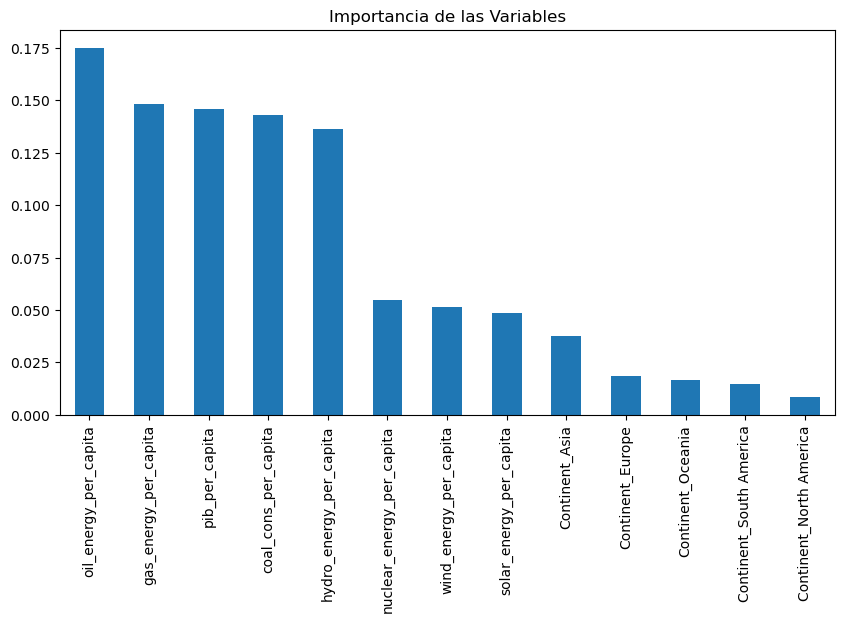

In [681]:
# Visualizar
importancia.sort_values(ascending=False).plot(kind='bar', figsize=(10,5))
plt.title("Importancia de las Variables")
plt.show()

* Estos resultados reflejan la fuerte relación entre la dependencia de combustibles fósiles, petróleo y carbón, y la calidad del aire en un país.
* El PIB per cápita puede estar asociado a un mayor consumo de energía, lo que incrementa las emisiones contaminantes.


# Hacer predicciones con el modelo

In [684]:
X_test.columns

Index(['pib_per_capita', 'coal_cons_per_capita', 'gas_energy_per_capita',
       'oil_energy_per_capita', 'hydro_energy_per_capita',
       'solar_energy_per_capita', 'wind_energy_per_capita',
       'nuclear_energy_per_capita', 'Continent_Asia', 'Continent_Europe',
       'Continent_North America', 'Continent_Oceania',
       'Continent_South America'],
      dtype='object')

Para validar nuestro modelo, diseñamos una tabla con datos de prueba e hicimos predicciones.

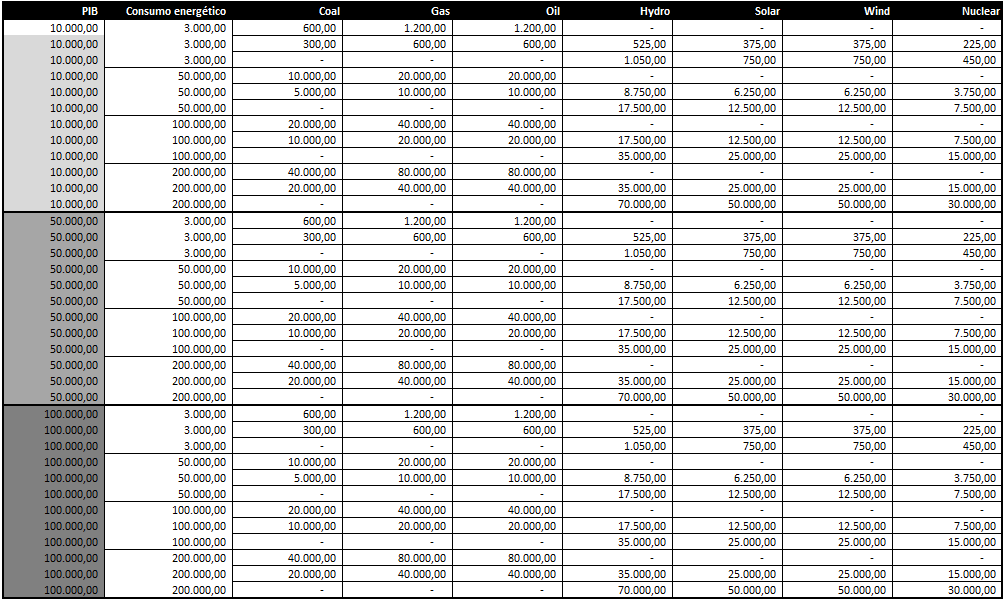

In [687]:
data_predict = ({
    'pib_per_capita': 100000,
    'coal_cons_per_capita': 0,
    'gas_energy_per_capita': 0,
    'oil_energy_per_capita': 0,
    'hydro_energy_per_capita': 70000,
    'solar_energy_per_capita': 50000,
    'wind_energy_per_capita': 50000,
    'nuclear_energy_per_capita': 30000,
    'Continent_Asia': 0,
    'Continent_Europe': 1,
    'Continent_North America': 0,
    'Continent_Oceania': 0,
    'Continent_South America': 0
})
# Convertir el diccionario a un DataFrame
X_new = pd.DataFrame([data_predict])
# Realizar predicciones
y_pred_esp = rf_clf.predict(X_new)
print(f'El índice de calidad del aire es: {y_pred_esp}')

El índice de calidad del aire es: ['Moderate']


Los resultados obtenidos, que se muestran en la columna de índice de calidad del aire (AQI), nos permitieron analizar la relación entre el consumo energético y la calidad del aire.

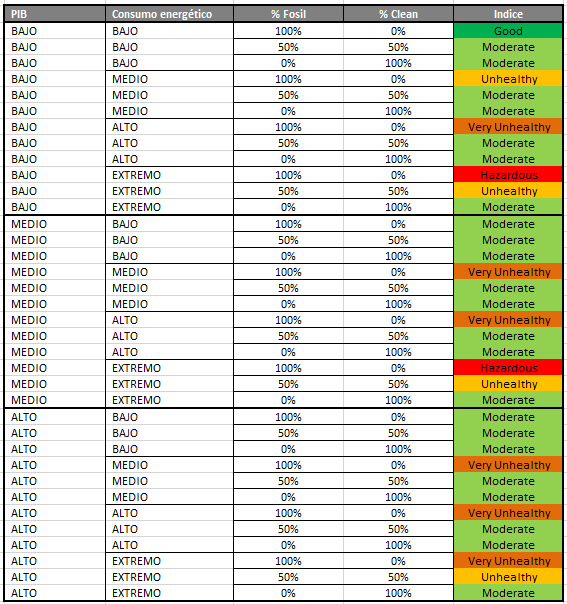

# Conclusiones

Hallazgos Principales:
* Bajos consumos energéticos
  
   --> La probabilidad de obtener un índice de calidad del aire bueno es alta.
  
   --> Este resultado es independiente del mix energético y del PIB per cápita del país.


* Consumos medios/altos

   --> Aquí, el mix energético juega un papel clave.
   --> Para mantener un índice de calidad del aire aceptable, el porcentaje de energía renovable debe superar el 50%.


* Consumos extremos

    --> La única forma de mantener niveles moderados de contaminación es con un mix cercano al 100% de energías renovables.



* Por último, se observa que los países con PIB más alto tienen más probabilidad de mitigar los efectos de la contaminación atmosférica debida a un consumo energético extremo.
Esto puede deberse a que los países más ricos disponen de mayor capacidad financiera y tecnológica para invertir en sistemas de reducción de emisiones. Además, suelen contar con normativas ambientales más estrictas.


En conclusión, si buscamos mejorar la calidad del aire y reducir la contaminación en las ciudades a nivel global, es fundamental implementar políticas ambientales efectivas y realizar inversiones en tecnología sostenible conjuntas.